# Metadata Summary & Exploratory Analysis

## Functions

In [1]:
# Converts all factors to character class
unfactorize <- function(df){
  for(i in which(sapply(df, class) == "factor")) df[[i]] = as.character(df[[i]])
  return(df)
}

In [2]:
# Converts character to factor class
factorize <- function(df){
  for(i in which(sapply(df, class) == "character")) df[[i]] = as.factor(df[[i]])
  return(df)
}

## Data

In [5]:
# Load library
library(tidyverse)

# Load data
letters  <- read.csv("../20210118_AM_Meta2Merge.csv")
glimpse(letters)

Rows: 915
Columns: 55
$ X                       <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14…
$ docsequence             <int> 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 3…
$ docid                   <fct> S10003-D023, S10003-D024, S10003-D025, S10003…
$ docyear                 <int> 1836, 1836, 1837, 1837, 1838, 1838, 1838, 183…
$ doctype                 <fct> Letter, Letter, Letter, Letter, Letter, Lette…
$ allsubject              <fct> "Childbirth; Church attendance; Cities; Farms…
$ broadsubj               <fct> Health; Religion; Communities; Relationships;…
$ personalevent           <fct> NA, NA, NA, NA, NA, NA, NA, NA, Physical illn…
$ wwritten                <fct> "Baltimore, MD; Maryland; United States; Mid-…
$ docauthorid             <fct> per0022938, per0022938, per0022938, per002293…
$ docauthorname           <fct> "Bruns, Jette, 1813-1899", "Bruns, Jette, 181…
$ language                <fct> English; German, English; German, English; Ge…
$ editor                  <fct

In [6]:
# Get rid of first column (remnant index columns)
letters <- letters[-1]
names(letters)

[1] "docsequence"             "docid"                  
 [3] "docyear"                 "doctype"                
 [5] "allsubject"              "broadsubj"              
 [7] "personalevent"           "wwritten"               
 [9] "docauthorid"             "docauthorname"          
[11] "language"                "editor"                 
[13] "briefname"               "nationality"            
[15] "birthyear"               "deathyear"              
[17] "birthplace"              "deathplace"             
[19] "ageatdeath"              "nativeoccupation"       
[21] "yearimmigration"         "stayednorthamerica.x"   
[23] "agewriting"              "marriagestatus"         
[25] "maternalstatus"          "authorgeneration"       
[27] "authorgender"            "culturalheritage"       
[29] "religion"                "northamericanoccupation"
[31] "religionNew"             "nationalOrigin"         
[33] "culture"                 "sinceMigration"         
[35] "authorLocation"          "A"                      
[37] "Agricultural"            "I"                      
[39] "Industrial"              "CCP"                    
[41] "Commercial"              "Professional"           
[43] "Domestic"                "Social"                 
[45] "Government"              "Other"                  
[47] "docmonth"                "docday"                 
[49] "docMonth"                "docDay"                 
[51] "docdate"                 "docDate"                
[53] "letterOrphan"            "letterLast"

In [7]:
# Verify the dataset.
# How many authors?
length(levels(letters$briefname))
length(levels(letters$docauthorid))

[1] 213

[1] 218

Why don't these match up? Maybe some names are associated with multiple doc IDs.

In [8]:
multipleIDs <- aggregate(docauthorid ~ briefname, # How many docauthorids per briefname
                         letters, 
                         function(x) length(unique(x)))
                         
multipleIDs[multipleIDs$docauthorid > 1,]

,briefname,docauthorid
62,"Anonymous Norwegian Immigrant in Brooklyn, NY",3
74,Anonymous Norwegian Immigrant in Wisconsin,2
84,Anonymous Russian Jewish Male,2
89,Anonymous Russian Jewish Mother,2


In [9]:
# How many unique cases are represented by these duplicated names
sum(multipleIDs[multipleIDs$docauthorid > 1,"docauthorid"]) - 
nrow(multipleIDs[multipleIDs$docauthorid > 1,])

[1] 5

In [10]:
# Are there an NAs to be aware of?
sum(is.na(letters$briefname))
sum(is.na(letters$docauthorname))

[1] 0

[1] 0

Four generic briefnames are associated with more than one ID, accounting for the difference of five between unique counts for briefname and docauthorname.

## Temporal Variables

### Time of Writing

In [102]:
# arrival and writing years over all letters
sort(table(letters$yearimmigration), decreasing = TRUE)
sort(table(letters$docyear), decreasing = TRUE)


1856 1836 1832 1853 1847 1862 1834 1882 1833 1819 1851 1830 1831 1835 1849 1848 
 212  136  109   34   32   13   12   12   10    8    8    7    7    7    6    4 
1908 1827 1841 1865 1913 1804 1828 1870 1895 1906 1801 1821 1824 1829 1837 1844 
   4    3    3    3    3    2    2    2    2    2    1    1    1    1    1    1 
1857 1890 1892 1905 1909 1910 1912 
   1    1    1    1    1    1    1 


1864 1859 1863 1858 1857 1860 1862 1861 1881 1833 1883 1823 1834 1882 1888 1853 
  50   47   47   40   36   35   33   28   20   18   18   17   17   16   15   14 
1850 1880 1906 1856 1865 1886 1849 1866 1870 1871 1878 1879 1831 1854 1872 1817 
  13   13   13   12   12   12   11   11   11   11   11   11   10   10   10    9 
1885 1889 1891 1837 1869 1876 1884 1887 1911 1828 1830 1838 1868 1894 1909 1913 
   9    9    9    8    8    8    8    8    8    7    7    7    7    7    7    7 
1855 1867 1893 1895 1908 1836 1839 1841 1852 1877 1890 1896 1907 1910 1842 1844 
   6    6    6    6    6    5    5    5    5    5    5    5    5    5    4    4 
1847 1848 1873 1874 1898 1822 1827 1832 1835 1840 1846 1851 1900 1905 1843 1845 
   4    4    4    4    4    3    3    3    3    3    3    3    3    3    2    2 
1875 1892 1897 1902 1912 1804 1805 1812 1824 1825 1901 1903 1904 
   2    2    2    2    2    1    1    1    1    1    1    1    1 

In [11]:
# Select unique authors
uniqueAuthors <- letters %>% 
distinct(docauthorid, .keep_all = T) %>%
glimpse()

Rows: 218
Columns: 54
$ docsequence             <int> 23, 2, 2, 4, 5, 8, 10, 12, 14, 15, 17, 18, 20…
$ docid                   <fct> S10003-D023, S1019-D002, S11067-D002, S11067-…
$ docyear                 <int> 1836, 1872, 1906, 1906, 1906, 1906, 1906, 190…
$ doctype                 <fct> Letter, Letter, Letter, Letter, Letter, Lette…
$ allsubject              <fct> "Childbirth; Church attendance; Cities; Farms…
$ broadsubj               <fct> Health; Religion; Communities; Relationships;…
$ personalevent           <fct> NA, NA, NA, Death of spouse, NA, NA, NA, Phys…
$ wwritten                <fct> "Baltimore, MD; Maryland; United States; Mid-…
$ docauthorid             <fct> per0022938, per0001043, per0033444, per003369…
$ docauthorname           <fct> "Bruns, Jette, 1813-1899", "Segale, Sister Bl…
$ language                <fct> English; German, English, English, English, E…
$ editor                  <fct> "Schroeder, Adoplh E., tr.; Geisberg, Carla S…
$ briefname               <fct

In [12]:
# Arrival years over unique authors
uniqueAuthors %>% 
count(yearimmigration, sort = TRUE)

yearimmigration,n
NA,146
1834,8
1830,6
1831,5
1833,5
1856,5
1832,4
1847,3
1827,2
1851,2


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   1801    1831    1834    1849    1856    1913     146 

[1] 28.33281

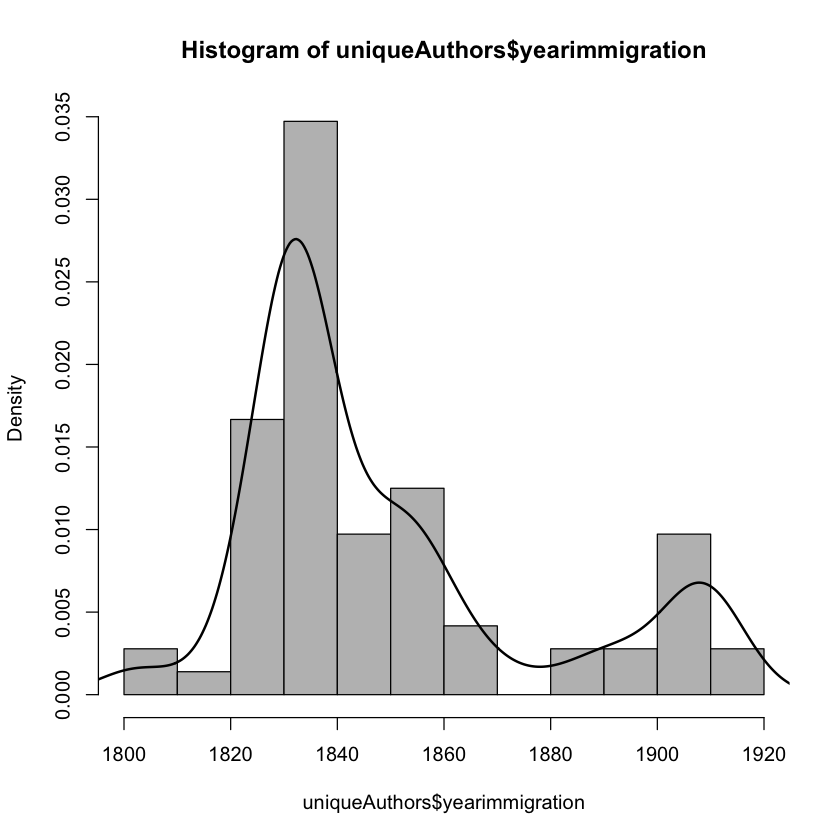

In [13]:
# Get summary info for year immigration (writing group)
summary(uniqueAuthors$yearimmigration)
sd(uniqueAuthors$yearimmigration, na.rm = TRUE)
hist(uniqueAuthors$yearimmigration, prob=TRUE, col="grey")
lines(density(uniqueAuthors$yearimmigration, na.rm = TRUE), col="black", lwd=2)

In [14]:
# What percentage of authors have missing data for immigration year.
146/218

[1] 0.6697248

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   1804    1856    1863    1865    1880    1913       8 

[1] 21.23488

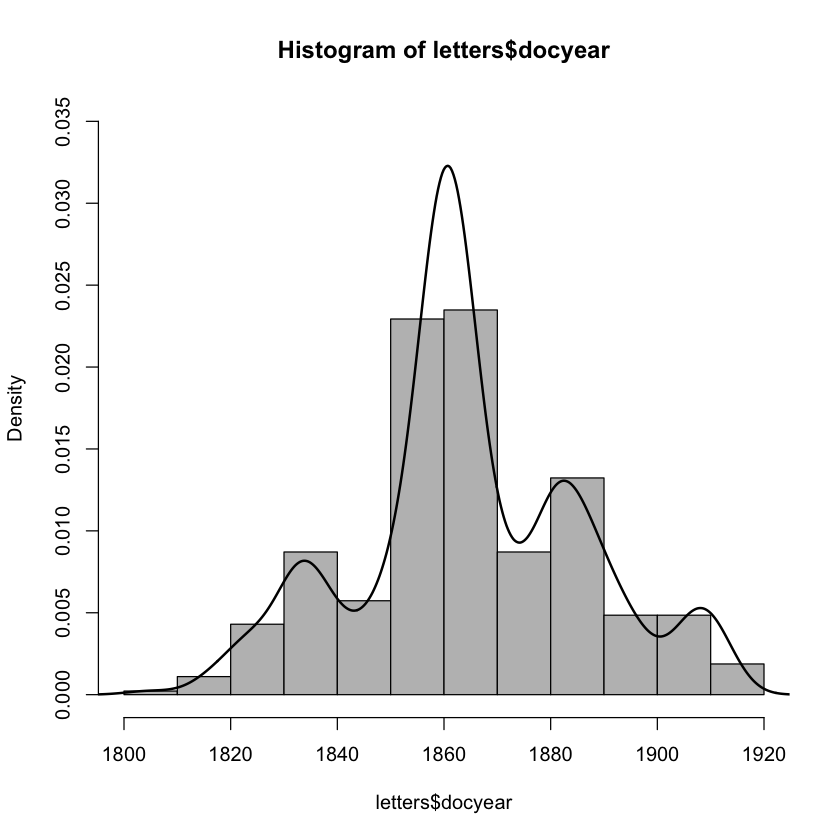

In [15]:
# Get summary for docyear (letter collection)
summary(letters$docyear)
sd(letters$docyear, na.rm = TRUE)
hist(letters$docyear, prob=TRUE, col="grey", ylim = c(0, .035))
lines(density(letters$docyear, na.rm = TRUE), col="black", lwd=2)

In [16]:
# How much missing data for doc year
sum(is.na(letters$docyear))/nrow(letters)

[1] 0.008743169

In [17]:
# Put years immigration for distinct authors into a vector
yearsImmigration <- letters %>% 
distinct(docauthorid, yearimmigration) 

# How long is that vector
nrow(yearsImmigration)

[1] 218

In [18]:
# Graphic won't work if number of rows are different because of different author and letter counts. 
# What's the difference
915-218

[1] 697

In [19]:
# Add NA rows to smaller DF
yearsImmigration[nrow(yearsImmigration)+697,] <- NA
glimpse(yearsImmigration)

Rows: 915
Columns: 2
$ docauthorid     <fct> per0022938, per0001043, per0033444, per0033693, per00…
$ yearimmigration <int> 1836, NA, 1906, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…


[1] "#1B9E77" "#D95F02" "#7570B3"

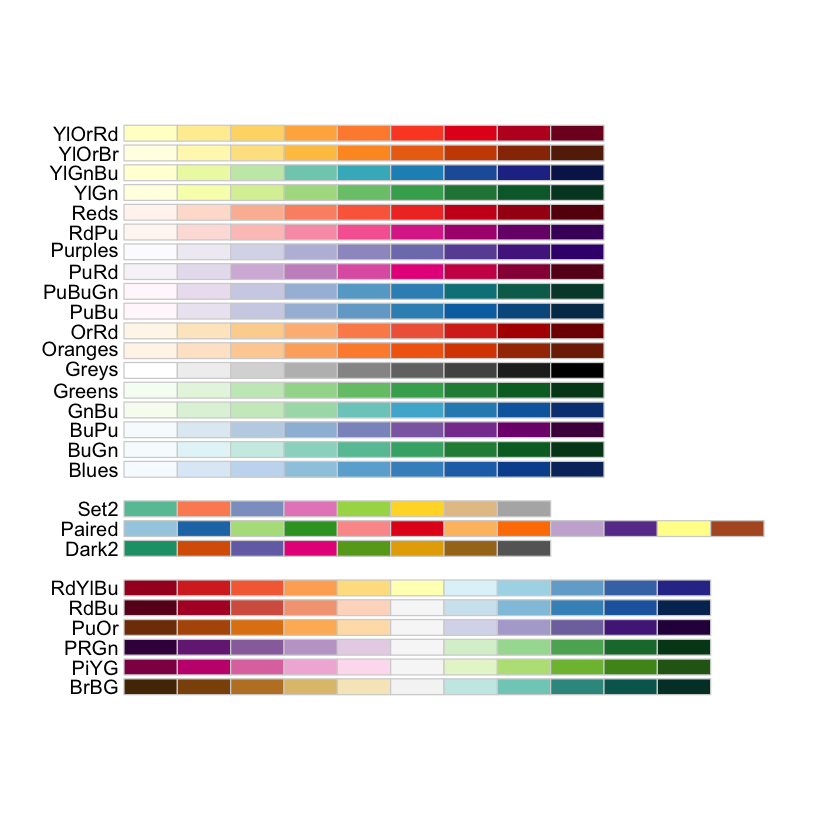

In [20]:
# Load libraries
library(RColorBrewer)

# See color blind palettes
display.brewer.all(colorblindFriendly = T)
brewer.pal(n = 3, name = "Dark2")

Saving 7 x 7 in image



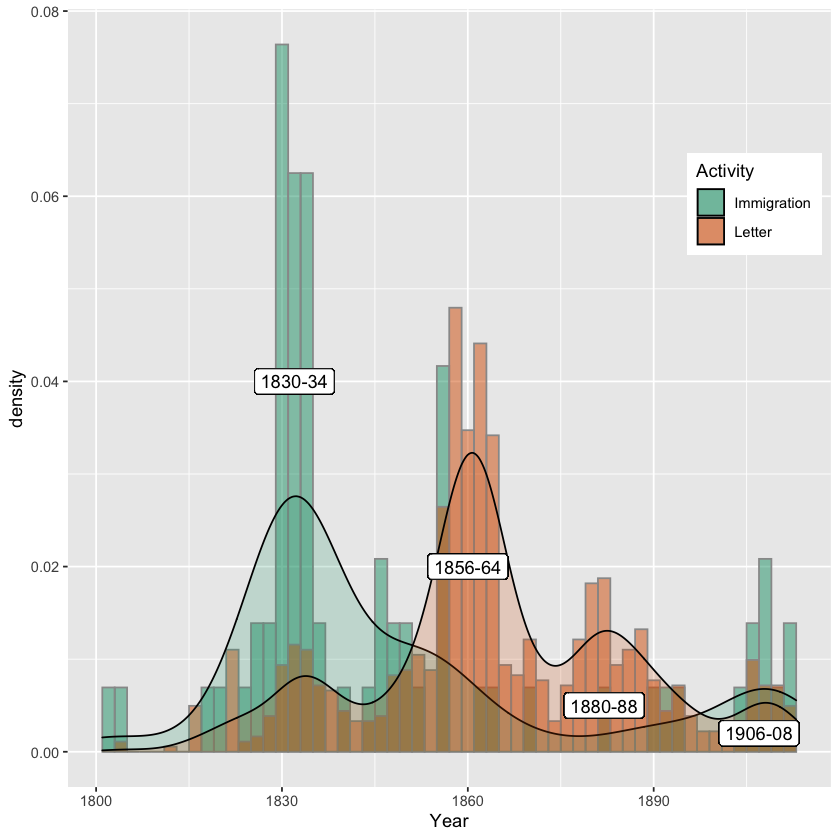

In [22]:
# Get data from main dataset
fig2g <- data.frame(yearsImmigration$yearimmigration, letters$docyear)
# Change column names for legend
colnames(fig2g) = c("Immigration", "Letter")
# Recode year data into factor
fig2h <- gather(fig2g,key = "Activity", value = Year, 1:2)
# Plot it
ggplot(fig2h, aes(x=Year, fill=Activity)) +
geom_histogram(binwidth = 2, 
               colour="grey60", 
               alpha=.5, 
               position="identity", 
               aes(y = ..density..), 
               na.rm = TRUE)+
geom_density(alpha = .2, na.rm = TRUE) +   
theme(legend.position=c(.9,.75)) +  
geom_label(
    label="1830-34", 
    x=1832,
    y=.04,
    color = "black",
    fill="white",
    hjust="center"
  )+  
geom_label(
    label="1856-64", 
    x=1860,
    y=.02,
    color = "black",
    fill="white",
    hjust="center"
  )+  
geom_label(
    label="1880-88", 
    x=1882,
    y=.005,
    color = "black",
    fill="white",
    hjust="center"
  )+  
geom_label(
    label="1906-08", 
    x=1907,
    y=.002,
    color = "black",
    fill="white",
    hjust="center"
  ) + 
scale_fill_brewer(palette = "Dark2")

ggsave("20201219_AM_YearDistribution.png")

### Time since Immigration

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00    3.00    7.00   15.31   24.00   62.00     263 

[1] 16.71905

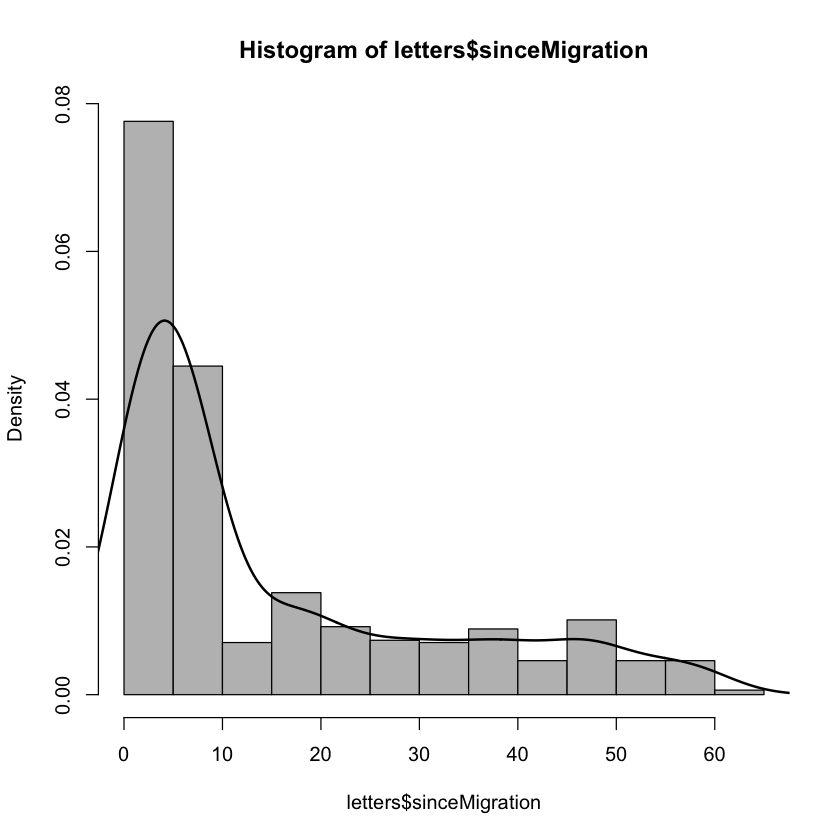

In [21]:
# Summary of Data
summary(letters$sinceMigration)
sd(letters$sinceMigration, na.rm = TRUE)
hist(letters$sinceMigration, prob=TRUE, col="grey")
lines(density(letters$sinceMigration, na.rm = TRUE), col="black", lwd=2)

In [22]:
sort(table(letters$sinceMigration), decreasing = TRUE)


 6  1  2  7  3  0  4  5  8 17 10 39 18 46 47  9 14 22 38 21 28 55 11 29 37 49 
52 49 47 43 42 41 38 36 32 28 10 10  9  9  9  8  8  8  8  7  7  7  6  6  6  6 
58 13 19 23 24 25 30 31 32 34 50 27 33 35 40 43 44 48 52 57 59 42 45 12 15 20 
 6  5  5  5  5  5  5  5  5  5  5  4  4  4  4  4  4  4  4  4  4  3  3  2  2  2 
26 54 16 36 41 51 53 60 61 62 
 2  2  1  1  1  1  1  1  1  1 

Saving 7 x 7 in image



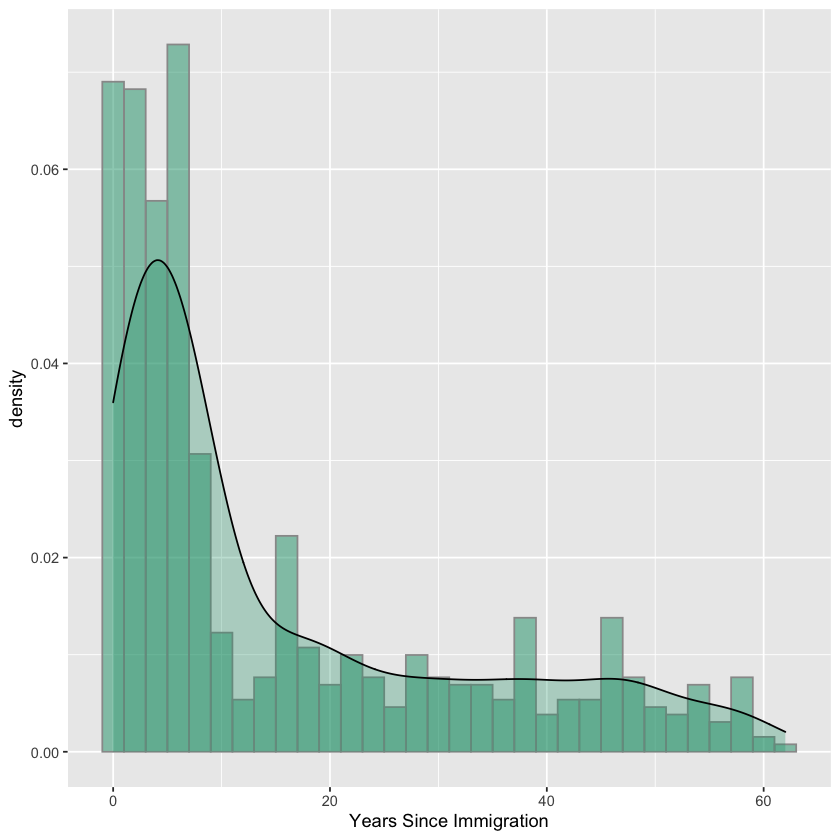

In [23]:
# Visualize in ggplot
letters %>% ggplot(aes(x=sinceMigration)) +
geom_histogram(binwidth = 2, 
               fill="#1B9E77",
               colour="grey60", 
               alpha=.5, 
               position="identity", 
               aes(y = ..density..), 
               na.rm = TRUE)+
geom_density(fill="#1B9E77", color="black", alpha = .3, na.rm = TRUE)+ 
scale_fill_brewer(palette = "Dark2") +
xlab("Years Since Immigration")

ggsave("20210101_AM_sinceMigration.png")

In [23]:
# Check that the number of NAs is correct.
nrow(subset(letters, is.na(letters$yearimmigration) | is.na(letters$docyear)))

[1] 263

In [24]:
#What is the percentage?
263/915

[1] 0.2874317

## Biographical Variables

### Location


       Canada         Other United States 
          427             7           481 


       Canada         Other United States 
  0.466666667   0.007650273   0.525683060 

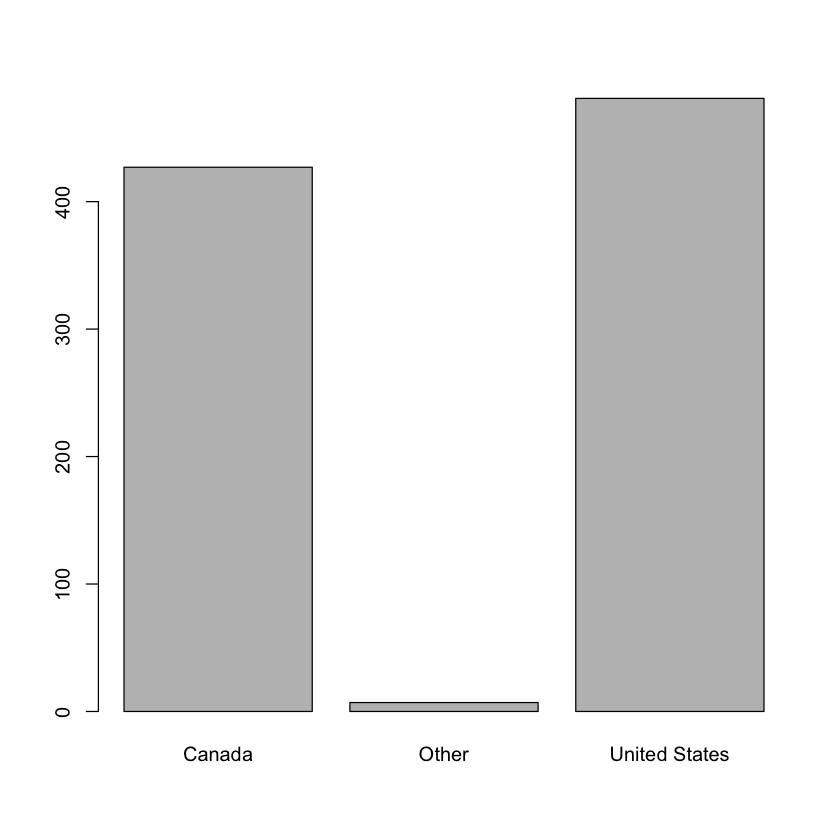

In [25]:
# What is the distribution in counts and percentages
table(letters$authorLocation)
prop.table(table(letters$authorLocation))
plot(letters$authorLocation)

In [26]:
#How many migrant letters from Mexico
nrow(filter(letters, grepl('Mexico',wwritten) & !(grepl('United States',wwritten))))
nrow(filter(letters, grepl('Mexico',wwritten) & !(grepl('United States',wwritten)))) / 915

[1] 3

[1] 0.003278689

In [27]:
filter(letters, !(grepl('Canada',wwritten)) &
       !(grepl('United States',wwritten)) &
       !(grepl('Mexico',wwritten))) %>% 
select(wwritten)

wwritten
Panama; Central America; North America
Jamaica; West Indies; North America
North America
Cuba; West Indies; North America


In [28]:
# Elsewhere in North America (e.g., Panama, Jamaica, etc.)
nrow(filter(letters, !(grepl('Canada',wwritten)) &
       !(grepl('United States',wwritten)) &
       !(grepl('Mexico',wwritten))))
nrow(filter(letters, !(grepl('Canada',wwritten)) &
       !(grepl('United States',wwritten)) &
       !(grepl('Mexico',wwritten)))) / 915

[1] 4

[1] 0.004371585

In [29]:
# Does this add up?
nrow(filter(letters, grepl('Canada',wwritten) & !(grepl('United States',wwritten))))+
nrow(filter(letters, grepl('United States',wwritten)))+
nrow(filter(letters, grepl('Mexico',wwritten) & !(grepl('United States',wwritten))))+
nrow(filter(letters, !(grepl('Canada',wwritten)) &
       !(grepl('United States',wwritten)) &
       !(grepl('Mexico',wwritten)))) +
sum(is.na(letters$wwritten))

[1] 915

In [30]:
sum(is.na(letters$authorLocation))

[1] 0

### Gender

In [31]:
# How much missing data for this variable?
sum(is.na(letters$authorgender))

[1] 0

In [32]:
# What is the breakdown for the group of authors?
letters %>% 
distinct(docauthorid, .keep_all = T) %>% 
count(authorgender)

authorgender,n
F,41
M,177


In [33]:
# How does this look in terms of percentages?
41/218
177/218

[1] 0.1880734

[1] 0.8119266


  F   M 
532 383 


        F         M 
0.5814208 0.4185792 

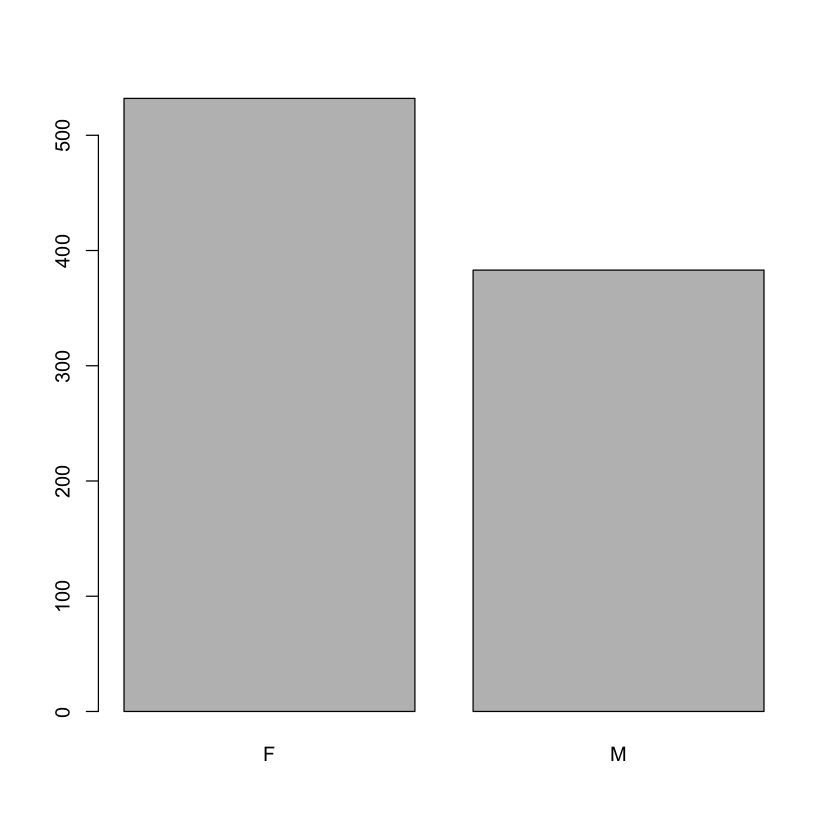

In [34]:
# What is the distribution in counts and percentages for the whole collection?
table(letters$authorgender)
prop.table(table(letters$authorgender))
plot(letters$authorgender)

Take a closer look at gender and location breakdown for writer-group and letter-collection.

In [35]:
# These are the main variables of interest.
vars  <- c("yearimmigration",
           "docauthorid", 
           "agewriting", 
           "sinceMigration",
           "authorgender", 
           "nationalOrigin", 
           "religionNew", 
           "authorLocation",
           "Agricultural", 
           "Industrial", 
           "Commercial", 
           "Professional", 
           "Domestic", 
           "Social", 
           "Government", 
           "stayednorthamerica.x",
           "ageatdeath",
           "deathplace"
          )

In [36]:
# Working DF
authorAge <- letters %>%
unfactorize() %>%
select(all_of(vars))
glimpse(authorAge)

## Recode some data
authorAge$authorgender[authorAge$authorgender=="M"] <- "Male"
authorAge$authorgender[authorAge$authorgender=="F"] <- "Female"
authorAge$nationalOrigin[is.na(authorAge$nationalOrigin)] <- "Unknown"
authorAge$religionNew[is.na(authorAge$religionNew)] <- "Unknown"

# Factorize
authorAge  <- factorize(authorAge)
summary(authorAge)

Rows: 915
Columns: 18
$ yearimmigration      <int> 1836, 1836, 1836, 1836, 1836, 1836, 1836, 1836, …
$ docauthorid          <chr> "per0022938", "per0022938", "per0022938", "per00…
$ agewriting           <int> 23, 23, 24, 24, 25, 25, 25, 26, 26, 26, 27, 27, …
$ sinceMigration       <int> 0, 0, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, …
$ authorgender         <chr> "F", "F", "F", "F", "F", "F", "F", "F", "F", "F"…
$ nationalOrigin       <chr> "German", "German", "German", "German", "German"…
$ religionNew          <chr> "Catholic", "Catholic", "Catholic", "Catholic", …
$ authorLocation       <chr> "United States", "United States", "United States…
$ Agricultural         <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE,…
$ Industrial           <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE,…
$ Commercial           <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE,…
$ Professional         <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE,…
$ Domestic             <lgl> T

 yearimmigration     docauthorid    agewriting    sinceMigration  authorgender
 Min.   :1801    per0038009:186   Min.   : 8.00   Min.   : 0.00   Female:532  
 1st Qu.:1835    per0022938:136   1st Qu.:32.00   1st Qu.: 3.00   Male  :383  
 Median :1847    per0004772:101   Median :41.00   Median : 7.00               
 Mean   :1846    per0001043: 56   Mean   :43.04   Mean   :15.31               
 3rd Qu.:1856    per0022575: 34   3rd Qu.:51.00   3rd Qu.:24.00               
 Max.   :1913    per0022530: 26   Max.   :85.00   Max.   :62.00               
 NA's   :259     (Other)   :376   NA's   :234     NA's   :263                 
   nationalOrigin     religionNew        authorLocation Agricultural   
 English  :363    Catholic  :197   Canada       :427    Mode :logical  
 German   :145    Christian :236   Other        :  7    FALSE:534      
 Norwegian:104    Jewish    : 34   United States:481    TRUE :230      
 Scottish : 69    Mormon    :  1                        NA's :151      
 Italian

In [37]:
# Get summary data for Canadians, Americans and Others
Canadian <- subset(authorAge, authorLocation == "Canada")
American <- subset(authorAge, authorLocation == "United States")
Other <- subset(authorAge, authorLocation == "Other")

summary(Canadian)
summary(American)
summary(Other)

 yearimmigration     docauthorid    agewriting    sinceMigration  authorgender
 Min.   :1824    per0038009:186   Min.   : 8.00   Min.   : 0.00   Female:300  
 1st Qu.:1832    per0004772:101   1st Qu.:40.00   1st Qu.: 3.00   Male  :127  
 Median :1856    per0022530: 26   Median :43.00   Median : 6.00               
 Mean   :1847    per0027000: 12   Mean   :44.99   Mean   :12.19               
 3rd Qu.:1856    per0026981: 10   3rd Qu.:50.00   3rd Qu.:20.00               
 Max.   :1862    per0038053: 10   Max.   :79.00   Max.   :50.00               
 NA's   :44      (Other)   : 82   NA's   :49      NA's   :44                  
         nationalOrigin     religionNew        authorLocation Agricultural   
 English        :327    Catholic  :  1   Canada       :427    Mode :logical  
 Scottish       : 57    Christian :221   Other        :  0    FALSE:229      
 Irish          : 22    Jewish    :  0   United States:  0    TRUE :173      
 Irish; Scottish: 17    Mormon    :  0                  

 yearimmigration     docauthorid    agewriting    sinceMigration  authorgender
 Min.   :1801    per0022938:136   Min.   :14.00   Min.   : 0.00   Female:231  
 1st Qu.:1836    per0001043: 55   1st Qu.:26.00   1st Qu.: 5.00   Male  :250  
 Median :1836    per0022575: 34   Median :33.00   Median :14.00               
 Mean   :1846    per0005226: 21   Mean   :40.76   Mean   :19.97               
 3rd Qu.:1853    per0021883: 12   3rd Qu.:52.00   3rd Qu.:30.00               
 Max.   :1913    per0021546:  8   Max.   :85.00   Max.   :62.00               
 NA's   :211     (Other)   :215   NA's   :181     NA's   :215                 
   nationalOrigin     religionNew        authorLocation Agricultural   
 German   :144    Catholic  :195   Canada       :  0    Mode :logical  
 Norwegian:101    Christian : 15   Other        :  0    FALSE:302      
 Italian  : 58    Jewish    : 34   United States:481    TRUE :56       
 English  : 35    Mormon    :  1                        NA's :123      
 Dutch  

 yearimmigration     docauthorid   agewriting    sinceMigration   authorgender
 Min.   :1830    per0001043:1    Min.   :20.00   Min.   :0.0000   Female:1    
 1st Qu.:1834    per0022682:1    1st Qu.:21.50   1st Qu.:0.0000   Male  :6    
 Median :1837    per0027000:1    Median :23.00   Median :0.0000               
 Mean   :1843    per0036388:1    Mean   :25.33   Mean   :0.3333               
 3rd Qu.:1850    per0038177:1    3rd Qu.:28.00   3rd Qu.:0.5000               
 Max.   :1862    per0038354:1    Max.   :33.00   Max.   :1.0000               
 NA's   :4       (Other)   :1    NA's   :4       NA's   :4                    
   nationalOrigin     religionNew       authorLocation Agricultural   
 Norwegian:2      Catholic  :1    Canada       :0      Mode :logical  
 English  :1      Christian :0    Other        :7      FALSE:3        
 German   :1      Jewish    :0    United States:0      TRUE :1        
 Irish    :1      Mormon    :0                         NA's :3        
 Italian  :1 

In [38]:
# Create subset
uniqueAuthors <- uniqueAuthors %>%
unfactorize() %>%
select(all_of(vars))
glimpse(uniqueAuthors)


Rows: 218
Columns: 18
$ yearimmigration      <int> 1836, NA, 1906, NA, NA, NA, NA, NA, NA, NA, NA, …
$ docauthorid          <chr> "per0022938", "per0001043", "per0033444", "per00…
$ agewriting           <int> 23, 22, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ sinceMigration       <int> 0, NA, 0, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ authorgender         <chr> "F", "F", "M", "F", "F", "M", "M", "M", "F", "F"…
$ nationalOrigin       <chr> "German", "Italian", "Russian", NA, NA, NA, "Rus…
$ religionNew          <chr> "Catholic", "Catholic", "Jewish", "Jewish", "Jew…
$ authorLocation       <chr> "United States", "United States", "United States…
$ Agricultural         <lgl> FALSE, FALSE, NA, NA, NA, NA, FALSE, FALSE, NA, …
$ Industrial           <lgl> FALSE, FALSE, NA, NA, NA, NA, FALSE, FALSE, NA, …
$ Commercial           <lgl> FALSE, FALSE, NA, NA, NA, NA, TRUE, TRUE, NA, TR…
$ Professional         <lgl> FALSE, FALSE, NA, NA, NA, NA, FALSE, FALSE, NA, …
$ Domestic             <lgl> T

In [39]:
## Recode some data
uniqueAuthors$authorgender[uniqueAuthors$authorgender=="M"] <- "Male"
uniqueAuthors$authorgender[uniqueAuthors$authorgender=="F"] <- "Female"

# Factorize
uniqueAuthors  <- factorize(uniqueAuthors)
summary(uniqueAuthors)

 yearimmigration     docauthorid    agewriting    sinceMigration   authorgender
 Min.   :1801    per0000238:  1   Min.   : 8.00   Min.   : 0.000   Female: 41  
 1st Qu.:1831    per0000624:  1   1st Qu.:20.00   1st Qu.: 0.000   Male  :177  
 Median :1834    per0001043:  1   Median :26.00   Median : 1.000               
 Mean   :1849    per0004772:  1   Mean   :29.59   Mean   : 3.157               
 3rd Qu.:1856    per0005226:  1   3rd Qu.:38.00   3rd Qu.: 3.000               
 Max.   :1913    per0007227:  1   Max.   :69.00   Max.   :22.000               
 NA's   :146     (Other)   :212   NA's   :177     NA's   :148                  
   nationalOrigin     religionNew        authorLocation Agricultural   
 Norwegian:73     Catholic  :  5   Canada       : 42    Mode :logical  
 English  :36     Christian : 16   Other        :  6    FALSE:54       
 Scottish :28     Jewish    : 34   United States:170    TRUE :39       
 Dutch    :25     Mormon    :  1                        NA's :125      


In [40]:
# Make table of gender and locations for distinct authors
author.locationGenderPercent <- uniqueAuthors %>% 
group_by(authorgender) %>% 
count(authorLocation, sort = TRUE)

# Calculate percentages
author.locationGenderPercent['percentages'] <- author.locationGenderPercent['n'] / 218
author.locationGenderPercent

authorgender,authorLocation,n,percentages
Male,United States,134,0.61467890
Male,Canada,37,0.16972477
Female,United States,36,0.16513761
Male,Other,6,0.02752294
Female,Canada,5,0.02293578


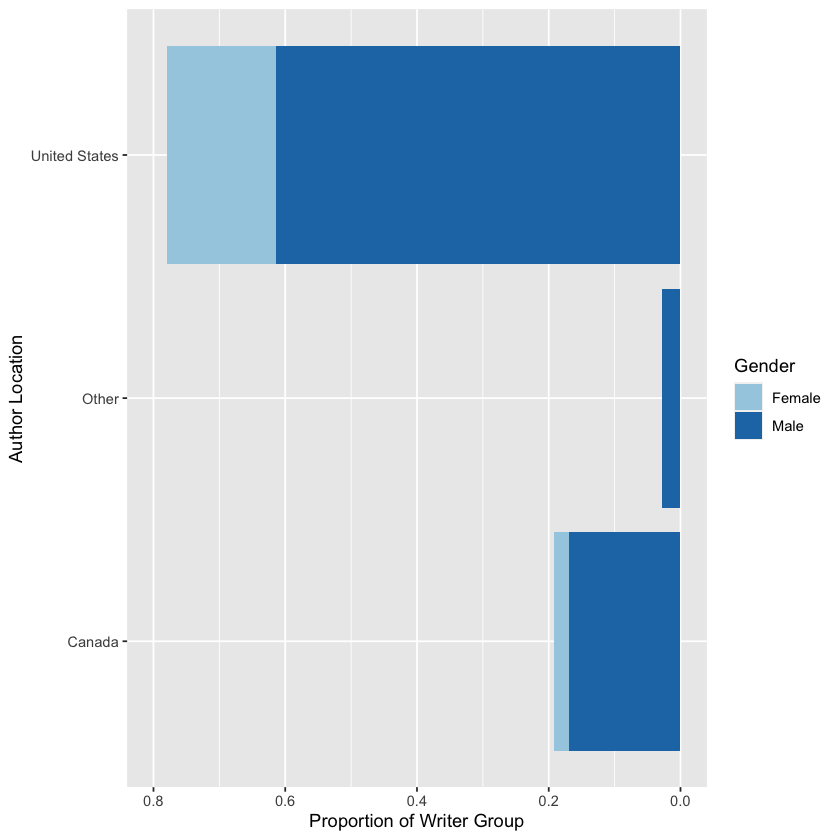

In [40]:
# Bar Chart (Stacked and Grouped)
author.locationGender <- ggplot(data=author.locationGenderPercent, aes(x=authorLocation, y=percentages, fill=authorgender)) +
geom_bar(position="stack", stat="identity") +
coord_flip() +
ylab("Proportion of Writer Group") +
xlab("Author Location")+
labs(fill = "Gender") +
ylim(.8,0)

author.locationGender +
scale_fill_brewer(palette="Paired")

In [41]:
# Make table of gender and locations for collection
collection.locationGenderPercent <- authorAge %>% 
group_by(authorgender) %>% 
count(authorLocation, sort = TRUE)

# Calculate percentages
collection.locationGenderPercent['percentages'] <- collection.locationGenderPercent['n'] / 915
collection.locationGenderPercent

authorgender,authorLocation,n,percentages
Female,Canada,300,0.327868852
Male,United States,250,0.273224044
Female,United States,231,0.252459016
Male,Canada,127,0.138797814
Male,Other,6,0.006557377
Female,Other,1,0.001092896


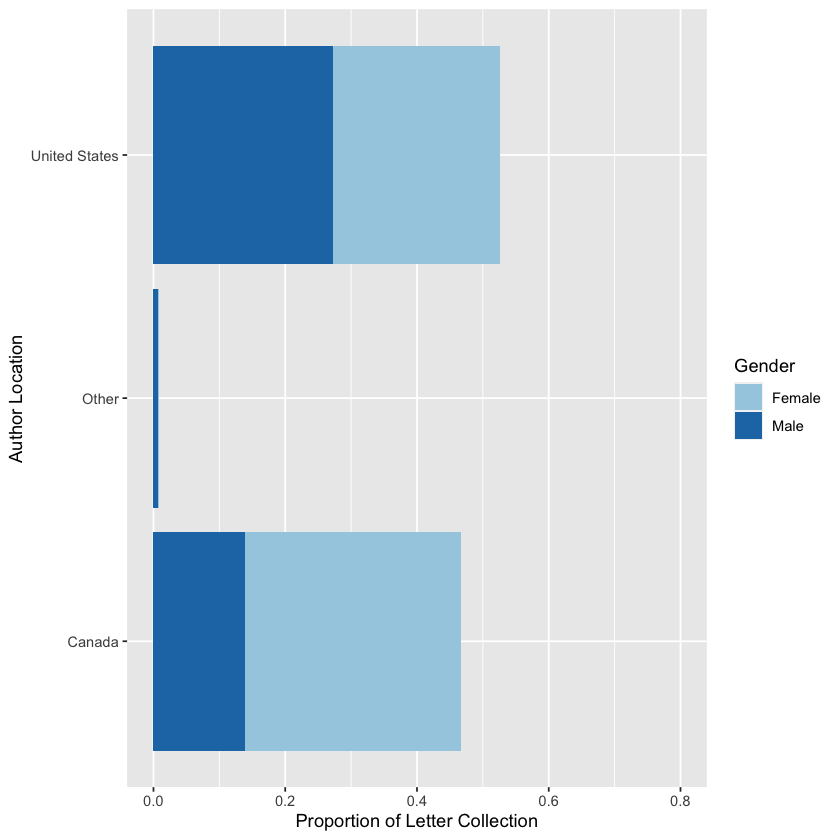

In [42]:
# Bar Chart (Stacked and Grouped)
collection.locationGender <- 
ggplot(data=collection.locationGenderPercent, aes(x=authorLocation, y = percentages, fill=authorgender)) +
geom_bar(position="stack", stat="identity") +
ylab("Proportion of Letter Collection") +
xlab("Author Location") +
labs(fill = "Gender") +
coord_flip() +
ylim(0, .8)

collection.locationGender +
scale_fill_brewer(palette="Paired")

Saving 7 x 7 in image



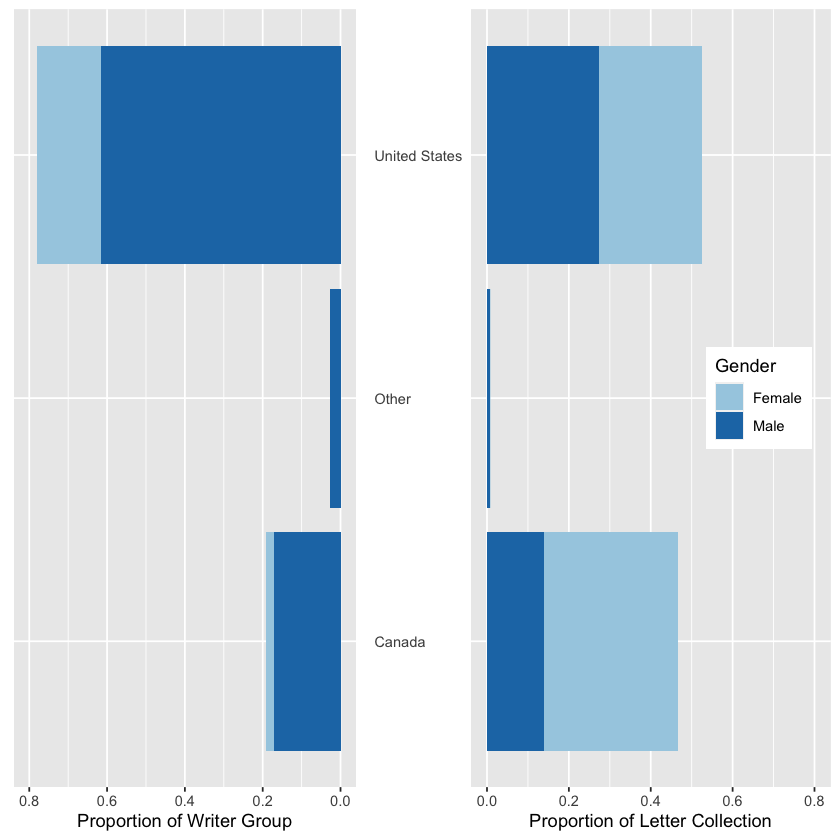

In [43]:
# Load Library
library(cowplot)

# Position plots side by side
p1b  <- author.locationGender + theme(axis.text.y = element_blank(), 
                   axis.ticks.y = element_blank(), 
                   legend.position="none") + 
xlab(NULL) +
scale_fill_brewer(palette="Paired")

p2b  <- collection.locationGender + theme(axis.ticks.y = element_blank(), 
                   axis.text.y = element_text(hjust = 0), 
                   legend.position=c(0.8, 0.5))+
xlab(NULL) + 
scale_fill_brewer(palette="Paired")

cowplot::plot_grid(p1b, p2b, rel_widths = c(1, 1.3))

ggsave("20210105_AM_locationGender.png")

There is a discord between writer group and letter collection gender breakdown. This seems like a good time to examine the number of letters per writer.

In [42]:
# Create table that shows number of letters per author
docsAuthor <- letters %>% 
unfactorize() %>%
count(docauthorid, sort = TRUE) 
glimpse(docsAuthor)

# How many 1-letter series?
docsAuthor %>% 
count(n == 1) 

# What are the counts for multi-letter series?
docsAuthor %>%
filter(n > 1)

# Check to make sure that the counts add up to the total number of letters in the collection.
sum(docsAuthor$n)

# What is the sum and percentage of the 100+ letter series?
docsAuthor %>%
filter(n > 100) %>%
select(n)%>%
sum()
423/915

# Get summary data and standard deviation
summary(docsAuthor$n)
sd(docsAuthor$n)

Rows: 218
Columns: 2
$ docauthorid <chr> "per0038009", "per0022938", "per0004772", "per0001043", "…
$ n           <int> 186, 136, 101, 56, 34, 26, 21, 13, 12, 10, 10, 9, 9, 8, 7…


n == 1,n
FALSE,54
TRUE,164


docauthorid,n
per0038009,186
per0022938,136
per0004772,101
per0001043,56
per0022575,34
per0022530,26
per0005226,21
per0027000,13
per0021883,12
per0026981,10


[1] 915

[1] 423

[1] 0.4622951

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   4.197   1.000 186.000 

[1] 17.46709

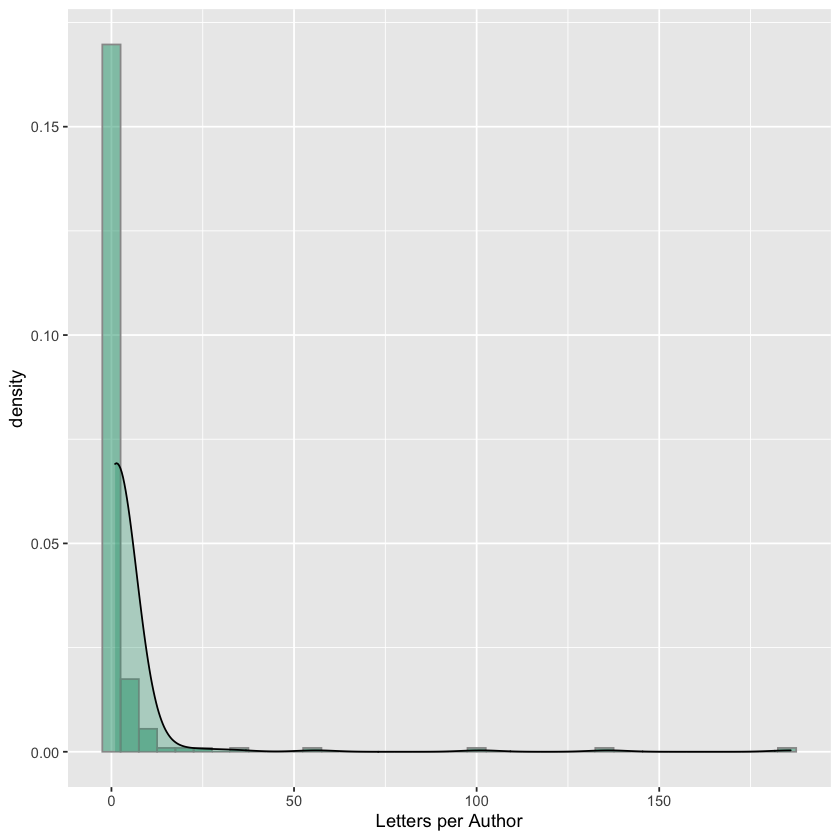

In [45]:
# Visuzalise
docsAuthor %>% ggplot(aes(x=n)) +
geom_histogram(binwidth = 5, 
               fill="#1B9E77",
               colour="grey60", 
               alpha=.5, 
               position="identity", 
               aes(y = ..density..), 
               na.rm = TRUE)+
geom_density(fill="#1B9E77", color="black", alpha = .3, na.rm = TRUE)+ 
scale_fill_brewer(palette = "Dark2") +
xlab("Letters per Author")

There are three series of more than 100 letters and eight series of that have 10 to 99 letters. The rest are series of fewer than 10, with 164 single-letter series.

In [43]:
# Who are the frequent writers.
freqWriters <- docsAuthor %>%
filter(n > 100) %>%
pull(docauthorid) 

unique(subset(letters, grepl(paste(freqWriters,collapse="|"),docauthorid), 
              select = c(docauthorid,
                         briefname,
                         authorgender,
                         nationalOrigin,
                         religionNew,
                         authorLocation,
                         A, 
                         I,
                         CCP,
                         Other,
                        Agricultural,
                        Industrial,
                        Commercial,
                        Professional,
                        Social,
                        Domestic,
                        Government, northamericanoccupation)
             ))

,docauthorid,briefname,authorgender,nationalOrigin,religionNew,authorLocation,A,I,CCP,Other,Agricultural,Industrial,Commercial,Professional,Social,Domestic,Government,northamericanoccupation
1,per0022938,Jette Bruns,F,German,Catholic,United States,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,Homemaker; Physician
229,per0004772,Susannah Moodie,F,English,Protestant,Canada,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,Farmer; Military; Writer
334,per0038009,Sarah Stretch Harris,F,English,Christian,Canada,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,Architect; Artist; Businessman; Clergy


In [44]:
# Who less prolific repeat writers
less100more1 <- docsAuthor %>%
filter(n <= 100 & n > 1) %>%
pull(docauthorid) 

summary(unique(subset(letters, grepl(paste(less100more1,collapse="|"),docauthorid), 
              select = c(docauthorid,
                         briefname,
                         authorgender,
                         nationalOrigin,
                         religionNew,
                         authorLocation,
                         A, 
                         I,
                         CCP )
             )))

     docauthorid                                          briefname 
 per0001043: 2   Alexander Robb                                : 2  
 per0027000: 2   Anonymous Male Scottish Farmer Immigrant      : 2  
 per0029184: 2   Sister Blandina Segale                        : 2  
 per0000624: 1   Aanen Fosdal                                  : 1  
 per0005226: 1   Anna Gronvold                                 : 1  
 per0014260: 1   Anonymous English Male Immigrant in Cincinnati: 1  
 (Other)   :45   (Other)                                       :45  
 authorgender   nationalOrigin     religionNew       authorLocation
 F: 8         English  :13     Catholic  : 3   Canada       :17    
 M:46         Norwegian:10     Christian : 7   Other        : 2    
              Scottish :10     Jewish    : 0   United States:35    
              Dutch    : 5     Mormon    : 0                       
              Irish    : 5     Protestant: 6                       
              Italian  : 3     NA's     

In [45]:
# Who are writers of the orphan letters
orphanWriters <- docsAuthor %>%
filter(n == 1) %>%
pull(docauthorid) 

summary(unique(subset(letters, grepl(paste(orphanWriters,collapse="|"),docauthorid), 
              select = c(docauthorid,
                         briefname,
                         authorgender,
                         nationalOrigin,
                         religionNew,
                         authorLocation,
                         A, 
                         I,
                         CCP )
             )))

     docauthorid                                          briefname  
 per0000238:  1   Anonymous Norwegian Immigrant in Brooklyn, NY:  3  
 per0007227:  1   Anonymous Norwegian Immigrant in Wisconsin   :  2  
 per0012569:  1   Anonymous Russian Jewish Male                :  2  
 per0014266:  1   Anonymous Russian Jewish Mother              :  2  
 per0017671:  1   A. Brunsting                                 :  1  
 per0022682:  1   A. De Weerd                                  :  1  
 (Other)   :158   (Other)                                      :153  
 authorgender   nationalOrigin     religionNew        authorLocation
 F: 31        Norwegian:63     Catholic  :  2   Canada       : 25   
 M:133        English  :21     Christian :  8   Other        :  5   
              Dutch    :20     Jewish    : 34   United States:134   
              Scottish :19     Mormon    :  1                       
              Russian  :16     Protestant:  9                       
              (Other)  :11

In [46]:
#Do these groups add up? (based on authorGender counts bc no NAs)
31+133+ #orphanWriters 
8+46+ #less100more1
3 #freqWriters

[1] 221

This is too high because there are extras in the less100more1. Examine this subset.

In [47]:
# Get the docids that show as having more than one case.
docIDs.less100more1 <- c("per0001043", "per0027000", "per0029184")

# Examine this group
unique(subset(letters, grepl(paste(docIDs.less100more1,collapse="|"),docauthorid), 
              select = c(docauthorid,
                         briefname,
                         authorgender,
                         nationalOrigin,
                         religionNew,
                         authorLocation,
                         A, 
                         I,
                         CCP)))


,docauthorid,briefname,authorgender,nationalOrigin,religionNew,authorLocation,A,I,CCP
137,per0001043,Sister Blandina Segale,F,Italian,Catholic,United States,FALSE,FALSE,TRUE
173,per0001043,Sister Blandina Segale,F,Italian,Catholic,Other,FALSE,FALSE,TRUE
597,per0027000,Alexander Robb,M,Irish,NA,Other,TRUE,TRUE,FALSE
598,per0027000,Alexander Robb,M,Irish,NA,Canada,TRUE,TRUE,FALSE
774,per0029184,Anonymous Male Scottish Farmer Immigrant,M,Scottish,NA,United States,TRUE,FALSE,FALSE
775,per0029184,Anonymous Male Scottish Farmer Immigrant,M,Scottish,NA,Canada,TRUE,FALSE,FALSE


The difference is attributable to the authors' locations varying. This will be allowed to stand because it is possible that the authors wrote their letters from different places.

### Age

In [48]:
# Summary Data
summary(letters$agewriting, na.rm=TRUE)
sd(letters$agewriting, na.rm=TRUE)
sort(table(letters$agewriting), decreasing = TRUE)

# How much missing data?
234/915

# Does missing data from letter pool match missing data from writer pool
nrow(unique(subset(authorAge, is.na(agewriting), select = c(docauthorid)))) #original letters
nrow(unique(subset(letters, is.na(agewriting), select = c(docauthorid)))) #subset from letters df
nrow(subset(uniqueAuthors, is.na(agewriting), select = c(docauthorid))) # writer pool

# Does missing data from letter pool match missing data from writer pool
nrow(unique(subset(authorAge, !is.na(authorLocation), select = c(docauthorid)))) #original letters
nrow(unique(subset(letters, !is.na(authorLocation), select = c(docauthorid)))) #subset from letters df
nrow(subset(uniqueAuthors, !is.na(authorLocation), select = c(docauthorid))) # writer pool

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   8.00   32.00   41.00   43.04   51.00   85.00     234 

[1] 16.92331


43 44 39 41 32 40 42 45 24 37 46 38 23 30 67 31 66 22 25 28 26 29 52 34 50 65 
39 32 29 28 27 26 24 24 22 18 18 17 16 13 13 12 12 11 11 11 10 10 10  9  9  9 
78 33 36 70 20 27 35 51 62 74 75 21 47 48 53 69 77 81 13 55 63 68 72  9 15 49 
 9  8  8  8  7  7  7  7  7  7  7  6  6  6  6  6  6  6  5  5  5  5  5  4  4  4 
56 59 61 76 80 82 11 12 14 16 54 73  8 10 18 19 64 57 58 60 71 79 83 84 85 
 4  4  4  4  4  4  3  3  3  3  3  3  2  2  2  2  2  1  1  1  1  1  1  1  1 

[1] 0.2557377

[1] 178

[1] 178

[1] 177

[1] 218

[1] 218

[1] 218

Why the 178 - 177 mismatch?

In [49]:
#Put docauthorids in lists
lettersAgeNA  <- unique(subset(authorAge, is.na(agewriting), select = c(docauthorid)))
writersAgeNA <- unique(subset(uniqueAuthors, is.na(agewriting), select = c(docauthorid))) 
# Check diffs
setdiff(lettersAgeNA,writersAgeNA) #What is different in lettersAgeNA
setdiff(writersAgeNA,lettersAgeNA) #What is different in writersAgeNA

# Examine the two DFs.
subset(authorAge, docauthorid == "per0031623", select = c(agewriting))
subset(uniqueAuthors, docauthorid == "per0031623", select = c(agewriting))

docauthorid
per0031623


docauthorid


,agewriting
226,38
227,NA
228,NA


,agewriting
36,38


The reason these do not match is that one of the three cases for this docauthorid includes the age, and this is the one included in the uniqueAuthors df.

Saving 7 x 7 in image



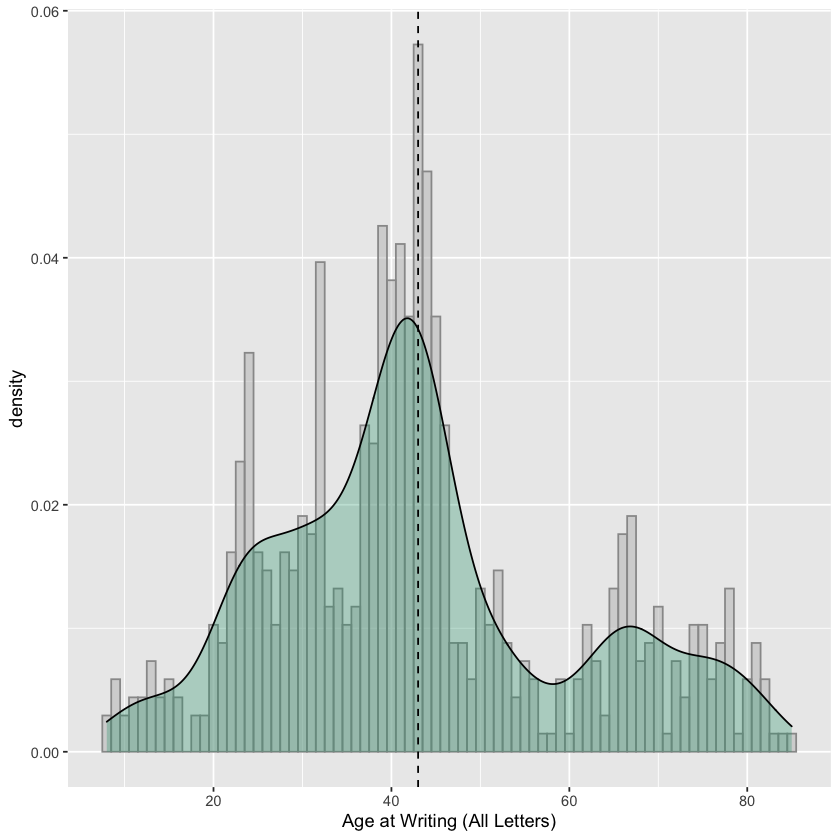

In [151]:
# Visualize age distribution
ageWriting <- letters %>% ggplot(aes(x=agewriting)) +
geom_histogram(binwidth = 1, 
               fill="grey",
               colour="grey60", 
               alpha=.5, 
               position="identity", 
               aes(y = ..density..), 
               na.rm = TRUE)+
geom_density(fill="#1B9E77", color="black", alpha = .3, na.rm = TRUE)+ 
scale_fill_brewer(palette = "Set2") +
xlab("Age at Writing (All Letters)") +
geom_vline(xintercept=43, color = "black", linetype="dashed")

ageWriting

# Save image to file
ggsave("20200105_AM_ageWriting.png")

In [50]:
# What are the most frequent ages?
sort(table(letters$agewriting), decreasing = TRUE)

# Summarize ages for men and women.
women <- subset(authorAge, authorgender == "Female")
men <- subset(authorAge, authorgender == "Male")
summary(women)
summary(men)


43 44 39 41 32 40 42 45 24 37 46 38 23 30 67 31 66 22 25 28 26 29 52 34 50 65 
39 32 29 28 27 26 24 24 22 18 18 17 16 13 13 12 12 11 11 11 10 10 10  9  9  9 
78 33 36 70 20 27 35 51 62 74 75 21 47 48 53 69 77 81 13 55 63 68 72  9 15 49 
 9  8  8  8  7  7  7  7  7  7  7  6  6  6  6  6  6  6  5  5  5  5  5  4  4  4 
56 59 61 76 80 82 11 12 14 16 54 73  8 10 18 19 64 57 58 60 71 79 83 84 85 
 4  4  4  4  4  4  3  3  3  3  3  3  2  2  2  2  2  1  1  1  1  1  1  1  1 

 yearimmigration     docauthorid    agewriting    sinceMigration  authorgender
 Min.   :1830    per0038009:186   Min.   : 8.00   Min.   : 0.00   Female:532  
 1st Qu.:1836    per0022938:136   1st Qu.:39.00   1st Qu.: 4.00   Male  :  0  
 Median :1836    per0004772:101   Median :43.00   Median : 8.00               
 Mean   :1845    per0001043: 56   Mean   :47.33   Mean   :19.32               
 3rd Qu.:1856    per0026998:  6   3rd Qu.:59.00   3rd Qu.:35.00               
 Max.   :1913    per0038055:  6   Max.   :85.00   Max.   :62.00               
 NA's   :88      (Other)   : 41   NA's   :34      NA's   :88                  
   nationalOrigin     religionNew        authorLocation Agricultural   
 English  :296    Catholic  :195   Canada       :300    Mode :logical  
 German   :136    Christian :198   Other        :  1    FALSE:389      
 Italian  : 56    Jewish    : 17   United States:231    TRUE :111      
 Norwegian: 13    Mormon    :  0                        NA's :32       
 Unknown

 yearimmigration     docauthorid    agewriting    sinceMigration  authorgender
 Min.   :1801    per0022575: 34   Min.   : 8.00   Min.   : 0.00   Female:  0  
 1st Qu.:1834    per0022530: 26   1st Qu.:23.00   1st Qu.: 1.00   Male  :383  
 Median :1848    per0005226: 21   Median :30.00   Median : 5.00               
 Mean   :1850    per0027000: 13   Mean   :31.37   Mean   : 6.76               
 3rd Qu.:1856    per0021883: 12   3rd Qu.:38.00   3rd Qu.: 9.25               
 Max.   :1912    per0026981: 10   Max.   :77.00   Max.   :32.00               
 NA's   :171     (Other)   :267   NA's   :200     NA's   :175                 
   nationalOrigin     religionNew        authorLocation Agricultural   
 Norwegian:91     Catholic  :  2   Canada       :127    Mode :logical  
 Scottish :68     Christian : 38   Other        :  6    FALSE:145      
 English  :67     Jewish    : 17   United States:250    TRUE :119      
 Prussian :34     Mormon    :  1                        NA's :119      
 Dutch  

In [51]:
# Percentages of missing data
200/234
34/234

[1] 0.8547009

[1] 0.1452991

In [52]:
# Age of biggest writers
summary(subset(letters, grepl(paste(freqWriters,collapse="|"),docauthorid), 
              select = c(docauthorid,
                         briefname,
                         agewriting)
             ))

     docauthorid                 briefname     agewriting   
 per0038009:186   Sarah Stretch Harris:186   Min.   :23.00  
 per0022938:136   Jette Bruns         :136   1st Qu.:40.00  
 per0004772:101   Susannah Moodie     :101   Median :45.00  
 per0000238:  0   A. Brunsting        :  0   Mean   :50.59  
 per0000624:  0   A. De Weerd         :  0   3rd Qu.:64.50  
 per0001043:  0   A. M. Sundheim      :  0   Max.   :85.00  
 (Other)   :  0   (Other)             :  0                  

In [53]:
# Visualize the age distribution for this group
# Make DF for graphic
ageFreqWriters  <- subset(letters, grepl(paste(freqWriters,collapse="|"),
                                         docauthorid),
                          select = c(docauthorid,
                                     briefname,
                                     agewriting))
colnames(ageFreqWriters)[2] = "Migrant"
head(ageFreqWriters)

docauthorid,Migrant,agewriting
per0022938,Jette Bruns,23
per0022938,Jette Bruns,23
per0022938,Jette Bruns,24
per0022938,Jette Bruns,24
per0022938,Jette Bruns,25
per0022938,Jette Bruns,25


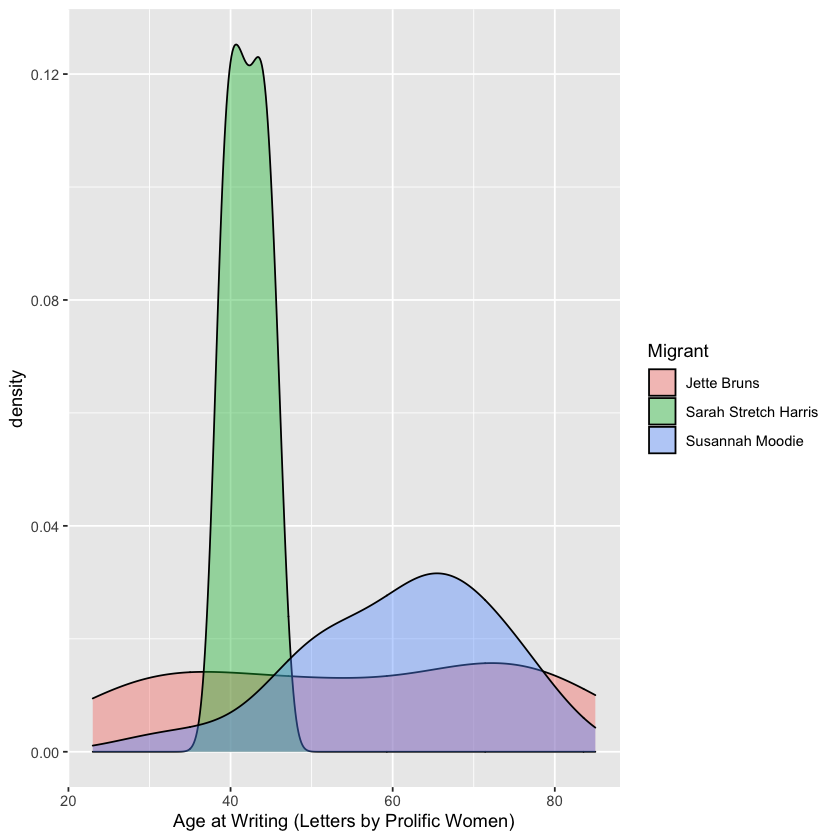

In [148]:
# Plot age distributions
p.ageFreqWriter <- ggplot(data=ageFreqWriters, aes(x=agewriting, group=Migrant, fill=Migrant)) +
    geom_density(adjust=1.5, alpha=.4)  + 
xlab("Age at Writing (Letters by Prolific Women)") 
p.ageFreqWriter

In [54]:
# Calculate means and put in DF
mu.ageFreqWriter  <- ageFreqWriters %>% group_by(Migrant) %>% summarise_at(vars(agewriting),              # Specify column
list(name = mean))
mu.ageFreqWriter

Migrant,name
Jette Bruns,54.54412
Sarah Stretch Harris,42.06989
Susannah Moodie,60.95050


In [55]:
# Get standard deviations
sd.ageFreqWriter  <- ageFreqWriters %>% group_by(Migrant) %>% summarise_at(vars(agewriting),              # Specify column
list(name = sd))
sd.ageFreqWriter

Migrant,name
Jette Bruns,19.648718
Sarah Stretch Harris,2.350493
Susannah Moodie,11.414356


Saving 7 x 7 in image



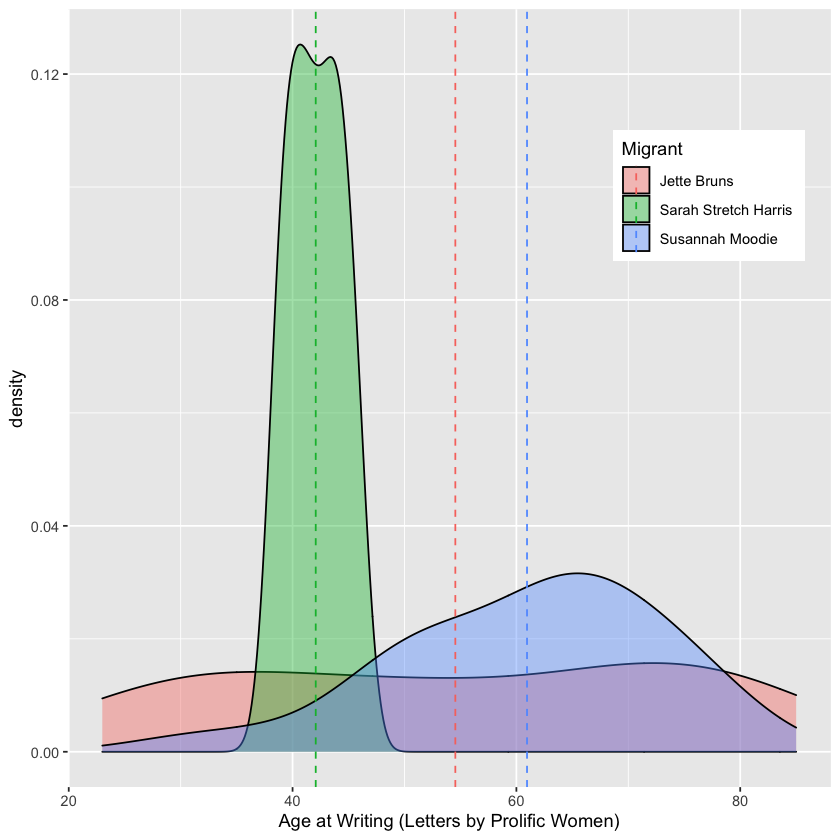

In [72]:
# Add mean lines to plot and save.
p.ageFreqWriterMU <- p.ageFreqWriter + geom_vline(data=mu.ageFreqWriter, aes(xintercept=name, color=Migrant),
             linetype="dashed") +   
theme(legend.position=c(.84,.76)) 
p.ageFreqWriterMU
ggsave("20210104_AM_ageFreqWriter.png")

Saving 7 x 7 in image



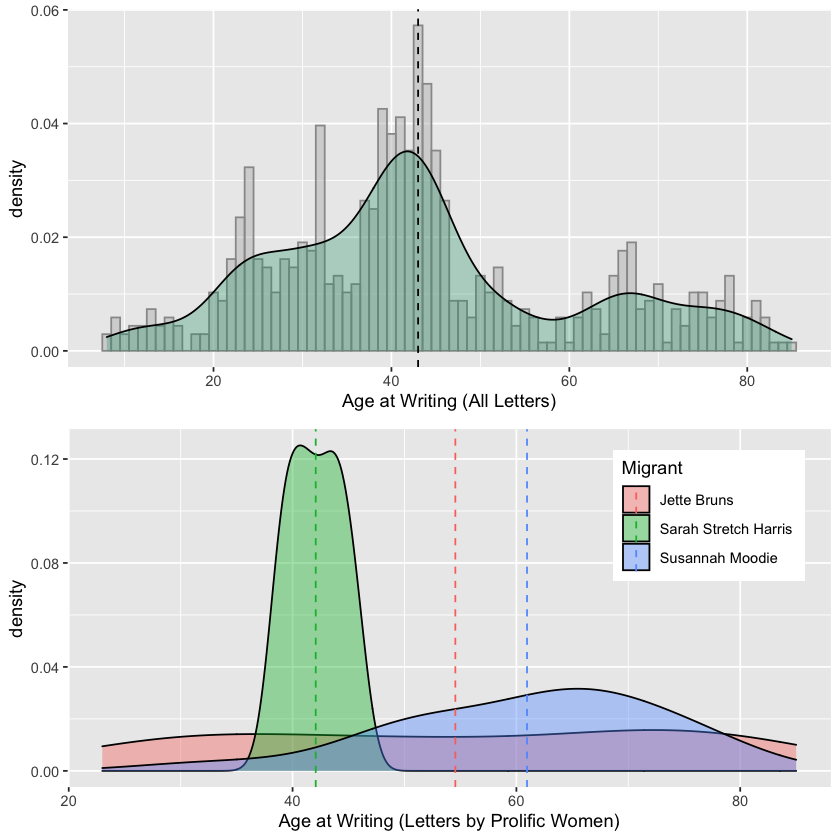

In [152]:
cowplot::plot_grid(ageWriting, p.ageFreqWriterMU, ncol = 1)
ggsave("20210112_AM_ageWritingCombo.png")

### Culture (National Origin and Religion)

In [56]:
# What is the breakdown for the group of authors?
authorOrigins <- letters %>% 
unfactorize() %>% 
distinct(docauthorid, .keep_all = T) %>% 
count(nationalOrigin, sort = TRUE) 

# View table
authorOrigins

nationalOrigin,n
Norwegian,73
English,36
Scottish,28
Dutch,25
Russian,16
NA,14
Irish,6
German,3
Polish,3
Czech,2


In [57]:
# What are the percentages in terms of the group of authors?
authorOrigins['percentages'] <- authorOrigins['n'] / 218
authorOrigins

nationalOrigin,n,percentages
Norwegian,73,0.334862385
English,36,0.165137615
Scottish,28,0.128440367
Dutch,25,0.114678899
Russian,16,0.073394495
NA,14,0.064220183
Irish,6,0.027522936
German,3,0.013761468
Polish,3,0.013761468
Czech,2,0.009174312


In [58]:
# Calculate number and percentage for Great Britain (i.e., English, Scottish)
36 + 28
(36 + 28) / 218

[1] 64

[1] 0.293578

In [59]:
# Tabulate religious data for group of authors
letters %>% 
unfactorize() %>% 
distinct(docauthorid, .keep_all = T) %>% 
filter(nationalOrigin == "Norwegian" | 
nationalOrigin == "English" |
nationalOrigin == "Scottish" |
nationalOrigin == "Dutch") %>% 
count(religionNew, sort = TRUE) 

religionNew,n
NA,134
Christian,15
Protestant,12
Mormon,1


In [60]:
# What percentage of the data is missing?
134/218

[1] 0.6146789

In [61]:
# What is the religion of the authors who have missing nationalOrigin data?
letters %>% 
unfactorize() %>%
distinct(docauthorid, .keep_all = T) %>% 
filter(is.na(nationalOrigin)) %>% 
count(religionNew, sort = TRUE) 

religionNew,n
Jewish,13
NA,1


In [62]:
# What is the religion for Russian authors?
letters %>% 
unfactorize() %>%
distinct(docauthorid, .keep_all = T) %>% 
filter(nationalOrigin == "Russian") %>% 
count(religionNew, sort = TRUE) 

religionNew,n
Jewish,16


In [63]:
# What is the religion of authors with full or partial Irish heritage?
letters %>% 
unfactorize() %>%
distinct(docauthorid, .keep_all = T) %>% 
filter(nationalOrigin == "Irish" |
      nationalOrigin == "Irish; Scottish") %>% 
count(religionNew, sort = TRUE) 

religionNew,n
NA,5
Protestant,2
Catholic,1


In [64]:
# What are the nationalOrigin breakdowns for various religious classes?
summary(subset(letters, religionNew == "Catholic", select = nationalOrigin))
summary(subset(letters, religionNew == "Protestant", select = nationalOrigin))
summary(subset(letters, religionNew == "Protestant" | religionNew == "Christian", select = nationalOrigin))
summary(subset(letters, religionNew == "Christian", select = nationalOrigin))
summary(subset(letters, religionNew == "Jewish", select = nationalOrigin))
sort(table(subset(letters, is.na(religionNew), select = nationalOrigin)), decreasing = TRUE)

        nationalOrigin
 German        :136   
 Italian       : 56   
 Czech         :  4   
 Irish         :  1   
 Dushane; Xhosa:  0   
 Dutch         :  0   
 (Other)       :  0   

         nationalOrigin
 English        :105   
 Scottish       : 28   
 Irish; Scottish: 17   
 Finnish        : 12   
 German         :  8   
 Norwegian      :  6   
 (Other)        :  1   

         nationalOrigin
 English        :332   
 Scottish       : 28   
 Irish; Scottish: 17   
 Norwegian      : 14   
 Finnish        : 12   
 German         :  8   
 (Other)        :  2   

        nationalOrigin
 English       :227   
 Norwegian     :  8   
 Polish        :  1   
 Czech         :  0   
 Dushane; Xhosa:  0   
 Dutch         :  0   
 (Other)       :  0   

    nationalOrigin
 Russian   :16    
 Polish    : 2    
 Spanish   : 2    
 Lithuanian: 1    
 Czech     : 0    
 (Other)   : 0    
 NA's      :13    


       Norwegian         Scottish            Dutch         Prussian 
              90               41               34               34 
         English            Irish French; Prussian   Dushane; Xhosa 
              30               25                7                3 
         Italian         European           German            Czech 
               3                1                1                0 
         Finnish  Irish; Scottish       Lithuanian           Polish 
               0                0                0                0 
         Russian          Spanish 
               0                0 

In [65]:
# How do these counts add up?
nrow(subset(letters, religionNew == "Catholic"))
nrow(subset(letters, religionNew == "Protestant"))
nrow(subset(letters, religionNew == "Christian"))
nrow(subset(letters, religionNew == "Protestant" | religionNew == "Christian"))
nrow(subset(letters, religionNew == "Jewish"))
sum(is.na(letters$religionNew))

[1] 197

[1] 177

[1] 236

[1] 413

[1] 34

[1] 270

In [66]:
# What are the nationalOrigins of Catholic authors?
authorsCatholic <- letters %>% 
unfactorize() %>%
distinct(docauthorid, .keep_all = T) %>% 
filter(religionNew == "Catholic") %>% 
count(nationalOrigin, sort = TRUE) 
authorsCatholic

# Total Catholic authors
sum(authorsCatholic$n)

# Share of total group of authors
5/218

nationalOrigin,n
Czech,2
German,1
Irish,1
Italian,1


[1] 5

[1] 0.02293578

In [67]:
# What are the nationalOrigins of Protestant authors?
authorsProtestant <- letters %>% 
unfactorize() %>%
distinct(docauthorid, .keep_all = T) %>% 
filter(religionNew == "Protestant") %>% 
count(nationalOrigin, sort = TRUE)
authorsProtestant

# Total authors       
sum(authorsProtestant$n)
       
# Share of total group of authors
sum(authorsProtestant$n)/218

nationalOrigin,n
Norwegian,6
Scottish,3
English,2
Irish; Scottish,2
Dutch,1
Finnish,1
German,1


[1] 16

[1] 0.0733945

In [68]:
# What are the nationalOrigins of Christian authors?
authorsChristian  <- letters %>% 
unfactorize() %>%
distinct(docauthorid, .keep_all = T) %>% 
filter(religionNew == "Christian") %>% 
count(nationalOrigin, sort = TRUE)
authorsChristian

# Total authors       
sum(authorsChristian$n)
       
# Share of total group of authors
sum(authorsChristian$n)/218

nationalOrigin,n
English,9
Norwegian,6
Polish,1


[1] 16

[1] 0.0733945

In [69]:
# nationalOrigins of Protestant plus Christian authors
authorsProtestantPlus <- letters %>% 
unfactorize() %>%
distinct(docauthorid, .keep_all = T) %>% 
filter(religionNew == "Protestant" | 
      religionNew == "Christian") %>% 
count(nationalOrigin, sort = TRUE)
authorsProtestantPlus

# Total authors       
sum(authorsProtestantPlus$n)
       
# Share of total
sum(authorsProtestantPlus$n)/218

nationalOrigin,n
Norwegian,12
English,11
Scottish,3
Irish; Scottish,2
Dutch,1
Finnish,1
German,1
Polish,1


[1] 32

[1] 0.146789

In [70]:
# nationalOrigins of Jewish authors
authorsJewish <- letters %>% 
unfactorize() %>%
distinct(docauthorid, .keep_all = T) %>% 
filter(religionNew == "Jewish") %>% 
count(nationalOrigin, sort = TRUE) 
authorsJewish

# Total Catholic authors
sum(authorsJewish$n)

# Share of total group of authors
34/218

nationalOrigin,n
Russian,16
NA,13
Polish,2
Spanish,2
Lithuanian,1


[1] 34

[1] 0.1559633

In [71]:
# NA authors and origins
authorsNA <- letters %>% 
unfactorize() %>%
distinct(docauthorid, .keep_all = T) %>% 
filter(is.na(religionNew)) %>% 
count(nationalOrigin, sort = TRUE) 
authorsNA

# Total Catholic authors
sum(authorsNA$n)

# Share of total
146/218

nationalOrigin,n
Norwegian,61
Scottish,25
Dutch,24
English,24
Irish,5
Dushane; Xhosa,1
European,1
French; Prussian,1
German,1
Italian,1


[1] 146

[1] 0.6697248

In [72]:
# Share of letters
print("Share of Letters")
197/915  # Catholic 
177/915  # Protestant
236/915  # Christian
413/915 # Protestant assuming "Christian" peeps are Protestant
34/915 # Jewish
270/915 # NA

print("Do these add up")
# Do these add up?
197/915 + # Catholic 
177/915 + # Protestant
236/915 + # Christian
34/915 + # Jewish
270/915 # NA

print("Letters per Person")
# Letters per person
197/5 # Catholic
177/16 # Protestant
236/16 # Christian
413/32 # Protestant assuming "Christian" peeps are Protestant
34/34 # Jewish
270/146 # NA

[1] "Share of Letters"


[1] 0.2153005

[1] 0.1934426

[1] 0.2579235

[1] 0.4513661

[1] 0.03715847

[1] 0.295082

[1] "Do these add up"


[1] 0.9989071

[1] "Letters per Person"


[1] 39.4

[1] 11.0625

[1] 14.75

[1] 12.90625

[1] 1

[1] 1.849315

In [73]:
# Make table of origins and religions for distinct authors
table_01 <- letters %>% 
unfactorize() %>%
distinct(docauthorid, .keep_all = T) %>% 
group_by(nationalOrigin) %>% 
count(religionNew, sort = TRUE) %>% 
arrange(nationalOrigin)

# Calculate percentages
table_01['percentages'] <- table_01['n'] / 218
table_01

nationalOrigin,religionNew,n,percentages
Czech,Catholic,2,0.009174312
Dushane; Xhosa,NA,1,0.004587156
Dutch,NA,24,0.110091743
Dutch,Protestant,1,0.004587156
English,NA,24,0.110091743
English,Christian,9,0.041284404
English,Protestant,2,0.009174312
English,Mormon,1,0.004587156
European,NA,1,0.004587156
Finnish,Protestant,1,0.004587156


In [74]:
# Change NA to Unknown for table
i <- sapply(table_01, is.factor) # Identify all factor variables in your data
table_01[i] <- lapply(table_01[i], as.character) # Convert factors to character variables
table_01[is.na(table_01)] <- "Unknown" # Replace NA with 0, as shown in Example 1
table_01[i] <- lapply(table_01[i], as.factor) # Convert character columns back to factors
table_01

nationalOrigin,religionNew,n,percentages
Czech,Catholic,2,0.009174312
Dushane; Xhosa,Unknown,1,0.004587156
Dutch,Unknown,24,0.110091743
Dutch,Protestant,1,0.004587156
English,Unknown,24,0.110091743
English,Christian,9,0.041284404
English,Protestant,2,0.009174312
English,Mormon,1,0.004587156
European,Unknown,1,0.004587156
Finnish,Protestant,1,0.004587156


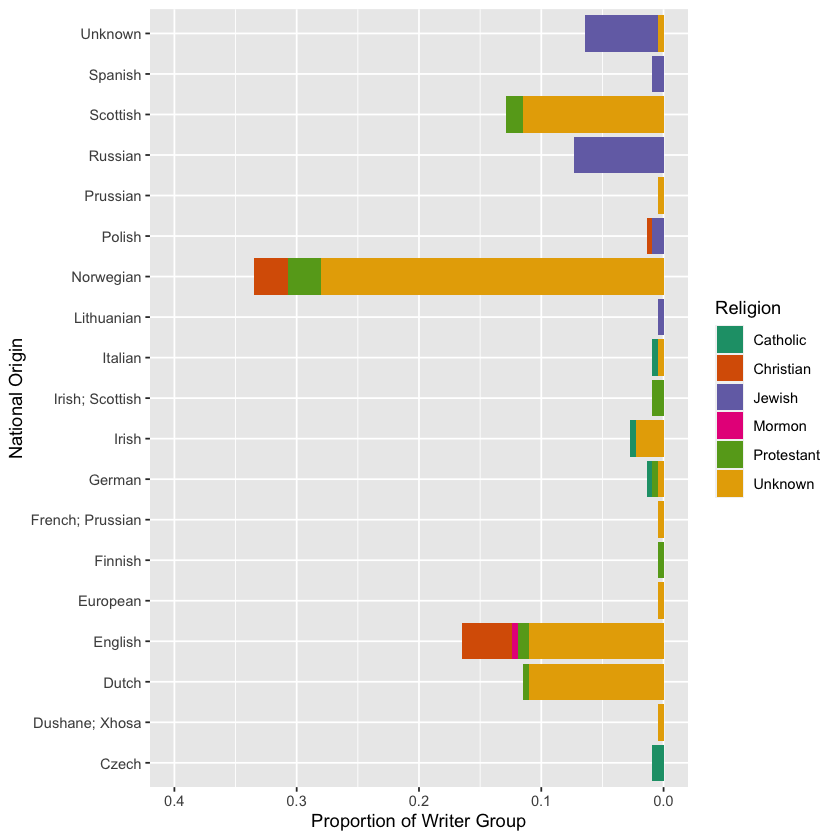

In [84]:
# Bar Chart (Stacked and Grouped)
p1 <- ggplot(table_01, 
       aes(fill=religionNew, y=percentages, x=nationalOrigin))  + 
geom_bar(position="stack", stat="identity") +
coord_flip() +
ylab("Proportion of Writer Group") +
xlab("National Origin") +
labs(fill = "Religion") +
ylim(.4,0)

p1 +
scale_fill_brewer(palette="Dark2")

In [75]:
# Make table of origins and religions for letter collection
table_02 <- letters %>% 
unfactorize() %>%
group_by(nationalOrigin) %>% 
count(religionNew, sort = TRUE) %>%
arrange(nationalOrigin)

# Calculate percentages
table_02['percentages'] <- table_02['n'] / 915
table_02

nationalOrigin,religionNew,n,percentages
Czech,Catholic,4,0.004371585
Dushane; Xhosa,NA,3,0.003278689
Dutch,NA,34,0.037158470
Dutch,Protestant,1,0.001092896
English,Christian,227,0.248087432
English,Protestant,105,0.114754098
English,NA,30,0.032786885
English,Mormon,1,0.001092896
European,NA,1,0.001092896
Finnish,Protestant,12,0.013114754


In [86]:
# Change NA to Unknown for table
i <- sapply(table_02, is.factor) # Identify all factor variables in your data
table_02[i] <- lapply(table_02[i], as.character) # Convert factors to character variables
table_02[is.na(table_02)] <- "Unknown" # Replace NA with 0, as shown in Example 1
table_02[i] <- lapply(table_02[i], as.factor) # Convert character columns back to factors
table_02

nationalOrigin,religionNew,n,percentages
Czech,Catholic,4,0.004371585
Dushane; Xhosa,Unknown,3,0.003278689
Dutch,Unknown,34,0.037158470
Dutch,Protestant,1,0.001092896
English,Christian,227,0.248087432
English,Protestant,105,0.114754098
English,Unknown,30,0.032786885
English,Mormon,1,0.001092896
European,Unknown,1,0.001092896
Finnish,Protestant,12,0.013114754


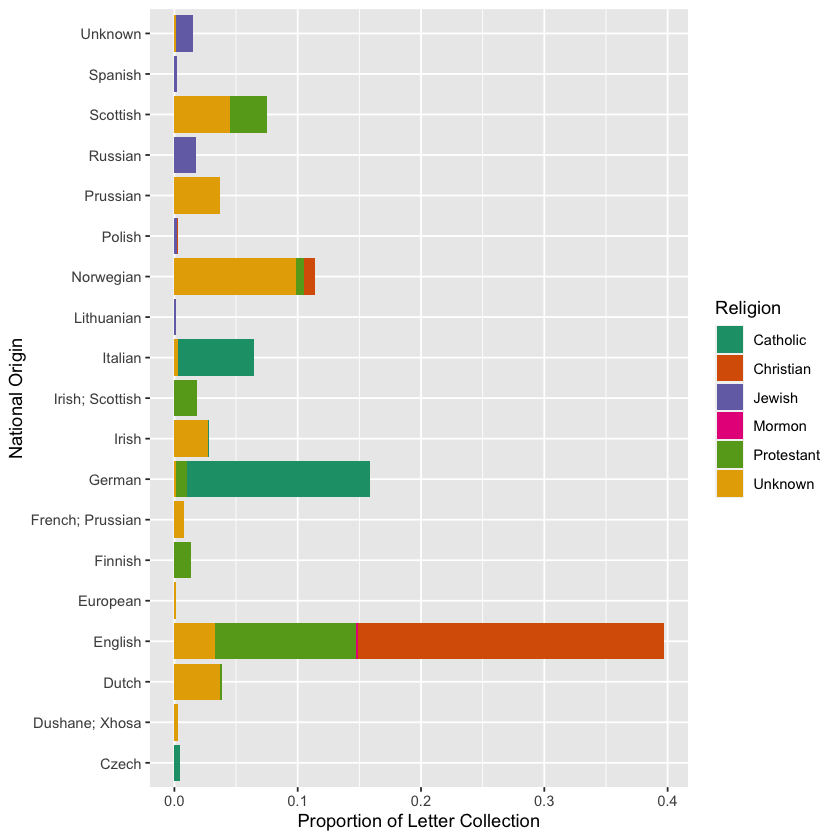

In [87]:
# Bar Chart (Stacked and Grouped)
p2 <- 
ggplot(table_02, 
       aes(fill=religionNew, y=percentages, x=nationalOrigin))  + 
geom_bar(position="stack", stat="identity") +
ylab("Proportion of Letter Collection") +
xlab("National Origin") +
labs(fill = "Religion") +
coord_flip() 

p2 +
scale_fill_brewer(palette="Dark2")

Saving 7 x 7 in image



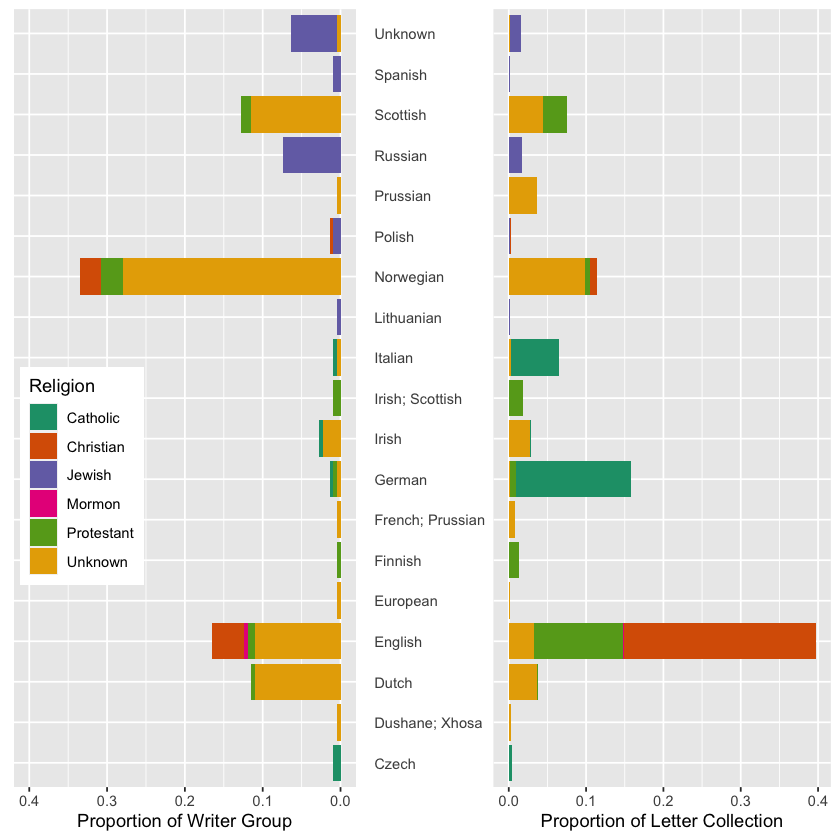

In [88]:
#Library
library(cowplot)

# Position plots side by side
p1a  <- p1 + theme(axis.text.y = element_blank(), 
                   axis.ticks.y = element_blank(), 
                   legend.position=c(0.2, 0.4)) + 
xlab(NULL) +
scale_fill_brewer(palette="Dark2")

p2a  <- p2 + theme(axis.ticks.y = element_blank(), 
                   axis.text.y = element_text(hjust = 0), 
                   legend.position="none")+
xlab(NULL) + 
scale_fill_brewer(palette="Dark2")

cowplot::plot_grid(p1a, p2a, rel_widths = c(1, 1.3))

ggsave("20210105_AM_CultureDistribution.png")

Visualize integrated biographical data (age, gender, culture)

Warning message:
“Removed 234 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 234 rows containing missing values (geom_point).”


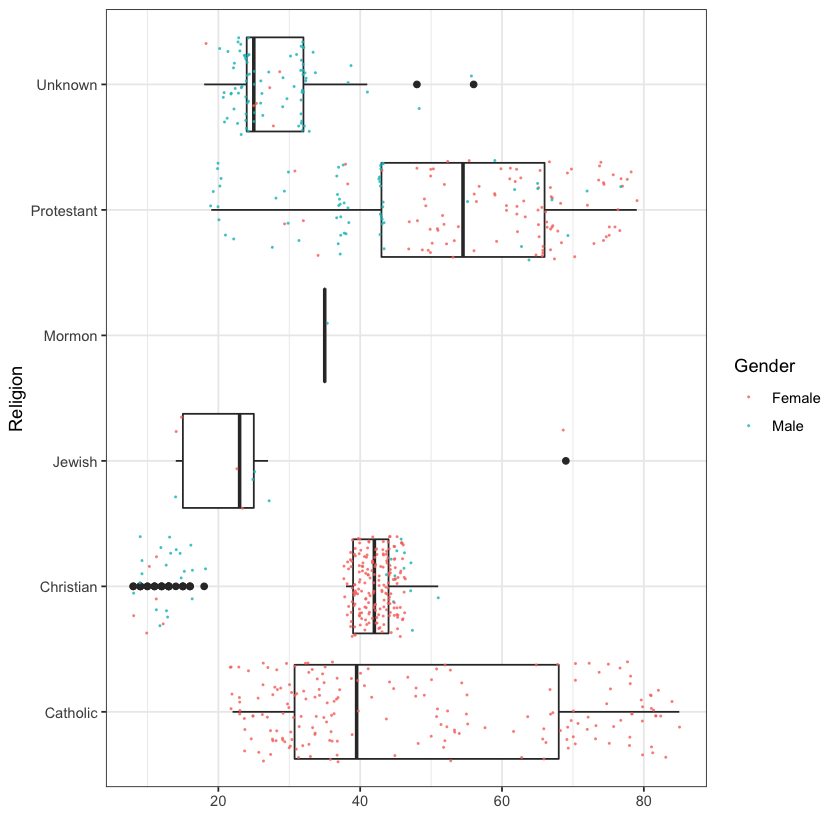

In [89]:
# Plot
ageGenderReligion  <- authorAge %>%
  ggplot( aes(x=agewriting, y=religionNew)) +
    geom_boxplot() +
    geom_jitter(aes(colour = authorgender), size=0.2, alpha=0.7) +
    xlab("")+
ylab("Religion")+
scale_colour_discrete("Gender")+
theme_bw()

ageGenderReligion

Warning message:
“Removed 234 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 234 rows containing missing values (geom_point).”


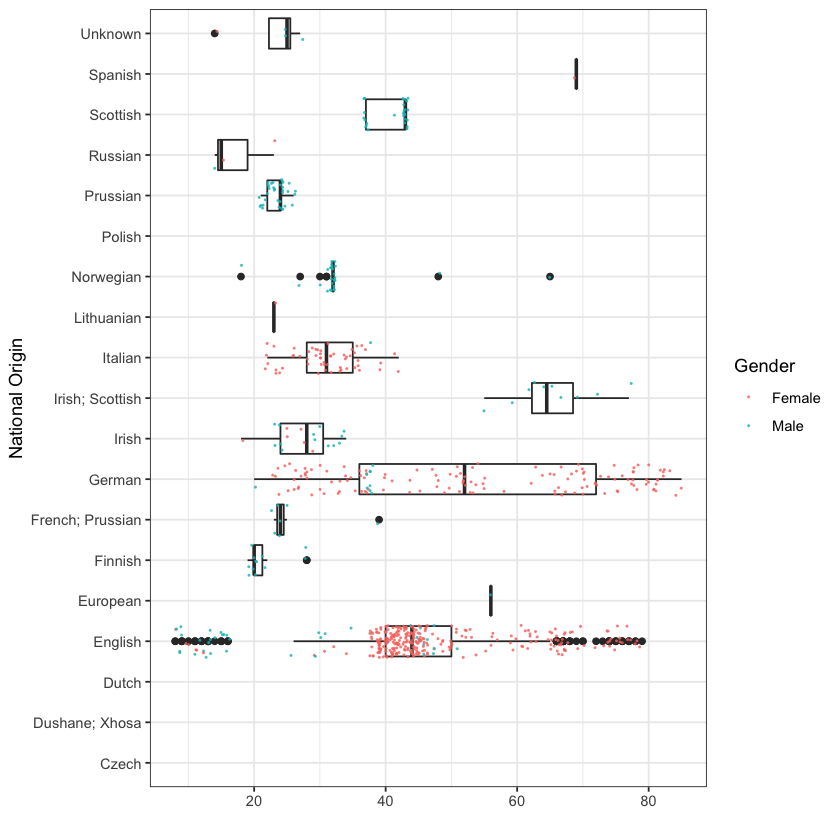

In [90]:
# Plot
ageGenderOrigin <- authorAge %>%
  ggplot( aes(x=agewriting, y=nationalOrigin)) +
    geom_boxplot() +
    geom_jitter(aes(colour = authorgender), size=0.2, alpha=0.7) +
    xlab("") +
ylab("National Origin") +
scale_colour_discrete("Gender")+
theme_bw()

ageGenderOrigin

Warning message:
“Removed 234 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 234 rows containing missing values (geom_point).”
Warning message:
“Removed 234 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 234 rows containing missing values (geom_point).”
Saving 7 x 7 in image



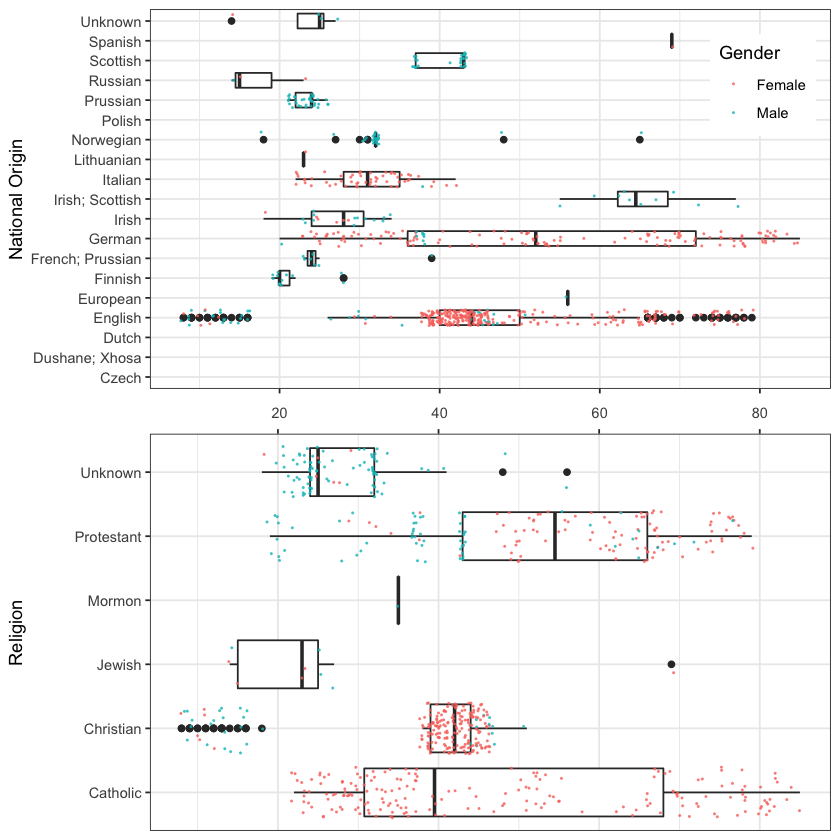

In [92]:
#Library
library(cowplot)
library(ggvis)

p1b  <- ageGenderOrigin + 
theme(axis.text.x = element_text(vjust = -2), 
      legend.position=c(0.9, 0.8))+
xlab(NULL) +
scale_fill_brewer(palette="Dark2")

p2b  <- ageGenderReligion + 
theme(axis.text.x = element_blank(), 
      legend.position="none") + 
scale_x_continuous(position = "top") + 
xlab(NULL) +
scale_fill_brewer(palette="Dark2")

cowplot::plot_grid(p1b, p2b, ncol = 1, align = 'v')

ggsave("20201220_AM_AgeOriginReligion.png")

Run the same plot for authorLocation to check for interesting patterns.

Warning message:
“Removed 234 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 234 rows containing missing values (geom_point).”


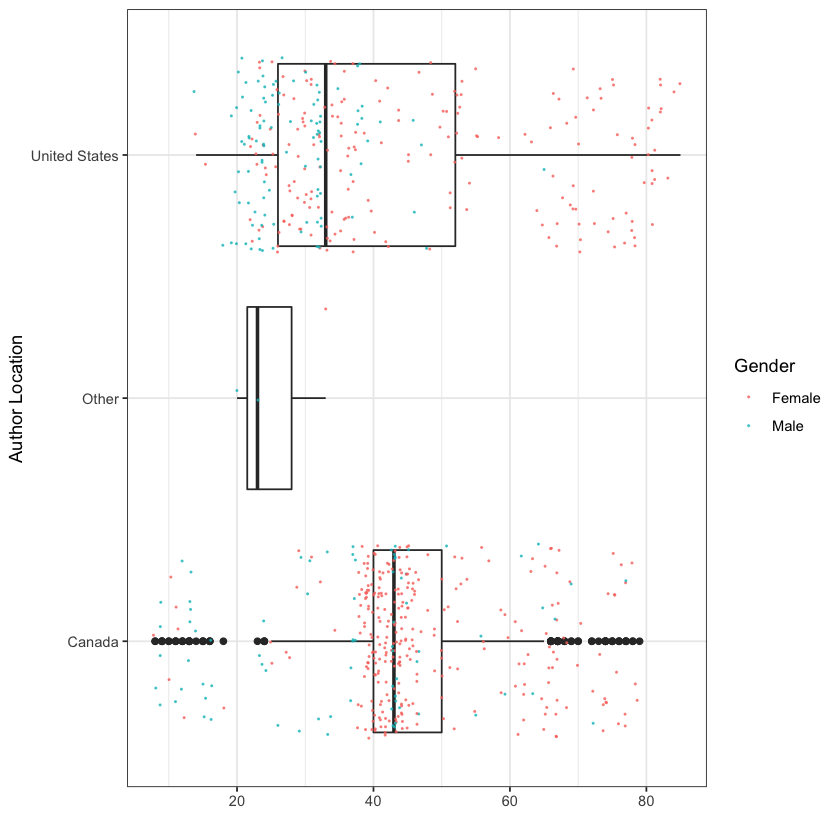

In [93]:
# Plot
ageGenderLocation <- authorAge %>%
  ggplot( aes(x=agewriting, y=authorLocation)) +
    geom_boxplot() +
    geom_jitter(aes(colour = authorgender), size=0.2, alpha=0.7) +
    xlab("") +
ylab("Author Location") +
scale_colour_discrete("Gender")+
theme_bw()

ageGenderLocation

The United States and Canada seem to have similar patterns, whereby male authors are younger. Nothing really surprising, that I can see, other than the older age of Canadian authors.

### Occupation

In [76]:
# Get Occupation Variables
Occupations  <- c("A", 
             "I", 
             "CCP", 
             "Other", 
             "Agricultural", 
             "Industrial", 
             "Commercial", 
             "Professional", 
             "Domestic", 
             "Social", 
             "Government") 

#Get summary info (which shows NAs and other forms of missing data)
glimpse(letters[Occupations])

Rows: 915
Columns: 11
$ A            <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, …
$ I            <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, …
$ CCP          <lgl> TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TR…
$ Other        <lgl> TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TR…
$ Agricultural <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, …
$ Industrial   <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, …
$ Commercial   <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, …
$ Professional <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, …
$ Domestic     <lgl> TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TR…
$ Social       <lgl> TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TR…
$ Government   <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, …


In [77]:
# Make a table containing occupations for unique authors
table_03 <- letters %>% 
distinct(docauthorid, .keep_all = T)
glimpse(table_03[Occupations])

Rows: 218
Columns: 11
$ A            <lgl> FALSE, FALSE, NA, NA, NA, NA, FALSE, FALSE, NA, FALSE, F…
$ I            <lgl> FALSE, FALSE, NA, NA, NA, NA, FALSE, FALSE, NA, FALSE, F…
$ CCP          <lgl> TRUE, TRUE, NA, NA, NA, NA, TRUE, TRUE, NA, TRUE, TRUE, …
$ Other        <lgl> TRUE, FALSE, NA, NA, NA, NA, FALSE, FALSE, NA, FALSE, FA…
$ Agricultural <lgl> FALSE, FALSE, NA, NA, NA, NA, FALSE, FALSE, NA, FALSE, F…
$ Industrial   <lgl> FALSE, FALSE, NA, NA, NA, NA, FALSE, FALSE, NA, FALSE, F…
$ Commercial   <lgl> FALSE, FALSE, NA, NA, NA, NA, TRUE, TRUE, NA, TRUE, TRUE…
$ Professional <lgl> FALSE, FALSE, NA, NA, NA, NA, FALSE, FALSE, NA, FALSE, F…
$ Domestic     <lgl> TRUE, FALSE, NA, NA, NA, NA, FALSE, FALSE, NA, FALSE, FA…
$ Social       <lgl> TRUE, TRUE, NA, NA, NA, NA, FALSE, FALSE, NA, FALSE, FAL…
$ Government   <lgl> FALSE, FALSE, NA, NA, NA, NA, FALSE, FALSE, NA, FALSE, F…


In [78]:
# Confirm that this table has correct number of authors
length(table_03$northamericanoccupation)

# Summarize the data
summary(table_03[Occupations])

[1] 218

     A               I              CCP            Other        
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:54        FALSE:83        FALSE:36        FALSE:88       
 TRUE :39        TRUE :10        TRUE :57        TRUE :5        
 NA's :125       NA's :125       NA's :125       NA's :125      
 Agricultural    Industrial      Commercial      Professional   
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:54        FALSE:83        FALSE:62        FALSE:78       
 TRUE :39        TRUE :10        TRUE :31        TRUE :15       
 NA's :125       NA's :125       NA's :125       NA's :125      
  Domestic         Social        Government     
 Mode :logical   Mode :logical   Mode :logical  
 FALSE:88        FALSE:68        FALSE:86       
 TRUE :5         TRUE :25        TRUE :7        
 NA's :125       NA's :125       NA's :125      

In [79]:
# How do these numbers add up?
39+10+57+5+125 # Step 1
39+10+31+15+5+25+7+125 # Step 2

[1] 236

[1] 257

In [80]:
# Double check the number of NAs in original dataset
sum(is.na(table_03$northamericanoccupation))

[1] 125

In [81]:
# Count the number of occupation classes per author
# 0 = NA for occupation
table(apply(table_03[c("A", "I", "CCP", "Other")], 1, sum))
table(apply(table_03[c("Agricultural", "Industrial", "Commercial", "Professional", "Domestic", "Social", "Government")], 1, sum))


 1  2 
75 18 


 1  2  3  4 
68 16  4  5 

In first set, 18 authors have two occupations. In second set, 16 authors have two occupations, 4 have three and 5 have four.

In [82]:
# Check these with total occupation counts above (cell 194)
236-18 # Step 1
257-(16+8+15) # Step 2

[1] 218

[1] 218

This works out just fine. Which occupations overlap?

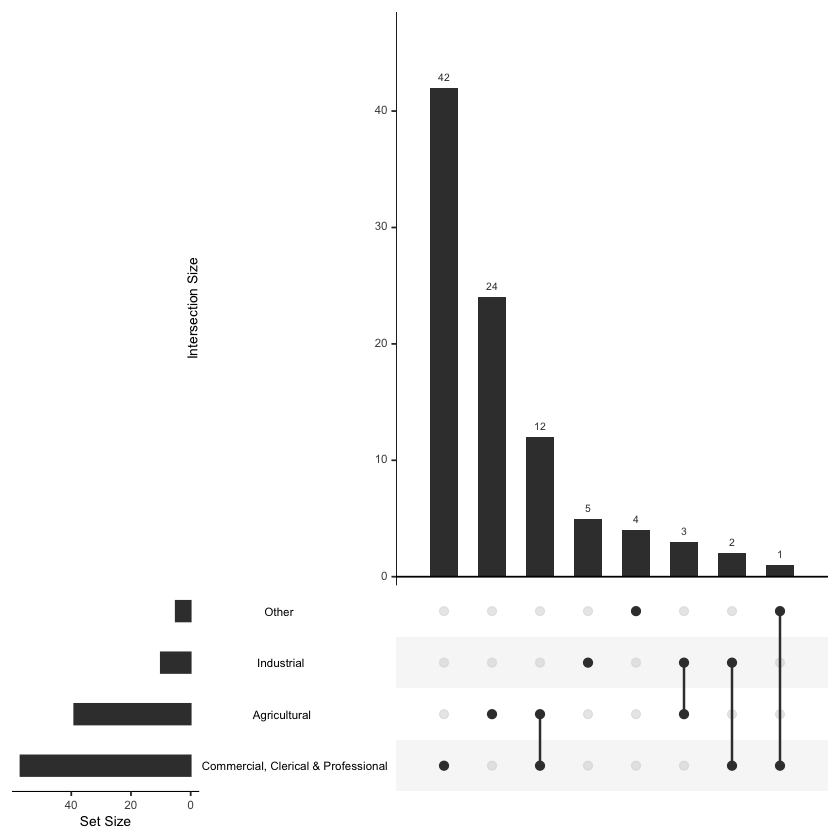

In [101]:
# Import Library
library(UpSetR)

# UpSet Plot
table_06 <- table_03[, c("A", "I", "CCP", "Other")]
colnames(table_06) = c("Agricultural", "Industrial", "Commercial, Clerical & Professional", "Other")
cols <- sapply(table_06, is.logical)
table_06[,cols] <- lapply(table_06[,cols], as.numeric)
table_06 <- table_06[complete.cases(table_06),]
upset(table_06, order.by = "freq")

In [102]:
# Draw and explort UpSetR plot
tiff(file="20201230_AM_Occupations_01.tiff", width = 5, height = 5, units = 'in', res = 150)
upset(table_06, order.by = "freq")
dev.off()

pdf 
  2

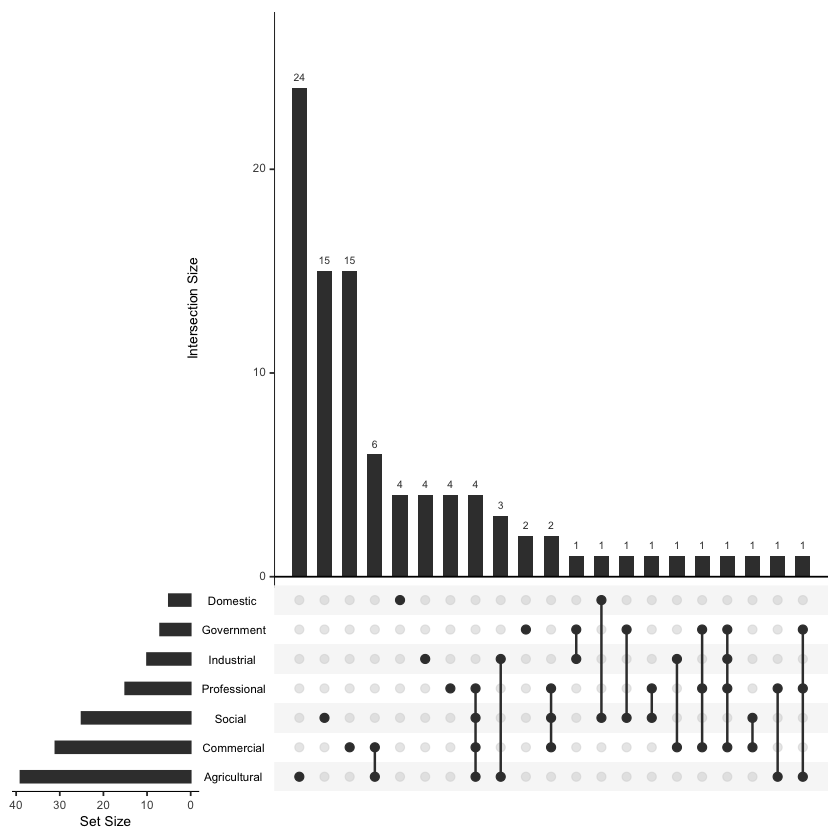

In [103]:
table_05 <- table_03[, c("Agricultural", "Industrial", "Commercial", "Professional", "Domestic", "Social", "Government")]
cols <- sapply(table_05, is.logical)
table_05[,cols] <- lapply(table_05[,cols], as.numeric)
table_05 <- table_05[complete.cases(table_05),]
upset(table_05, nsets = 7, order.by = "freq")

In [83]:
# Do these numbers add up?
24+(15*2)+6+(4*4)+3+(2*2)+(1*10)+125

[1] 218

Yes!

In [105]:
# Draw and explort UpSetR plot
tiff(file="20201230_Occupations_02.tiff", width = 5, height = 5, units = 'in', res = 150)
upset(table_05, nsets = 7, order.by = "freq")
dev.off()

pdf 
  2

In [84]:
# Summary
summary(table_03[c("Agricultural", "Industrial", "Commercial", "Professional", "Domestic", "Social", "Government")])

 Agricultural    Industrial      Commercial      Professional   
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:54        FALSE:83        FALSE:62        FALSE:78       
 TRUE :39        TRUE :10        TRUE :31        TRUE :15       
 NA's :125       NA's :125       NA's :125       NA's :125      
  Domestic         Social        Government     
 Mode :logical   Mode :logical   Mode :logical  
 FALSE:88        FALSE:68        FALSE:86       
 TRUE :5         TRUE :25        TRUE :7        
 NA's :125       NA's :125       NA's :125      

In [85]:
# Number of writers
39+10+31+15+5+25+7+125

[1] 257

In [86]:
# Tally number of occupations per writer
table(apply(table_03[c("Agricultural", "Industrial", "Commercial", "Professional", "Domestic", "Social", "Government")], 1, sum))


 1  2  3  4 
68 16  4  5 

In [87]:
# How many extras?
(16*1)+(2*4)+(3*5)

[1] 39

In [88]:
# Do the numbers add up?
257-39

[1] 218

In [89]:
# Cross-class rates

15/39 #Agricultural
6/10 #Industrial
16/31 #Commercial
11/15 #Professional
10/25 #Social
5/7 #Government
1/5 #Domestic


[1] 0.3846154

[1] 0.6

[1] 0.516129

[1] 0.7333333

[1] 0.4

[1] 0.7142857

[1] 0.2

## Permanence

In [90]:
summary(uniqueAuthors$stayednorthamerica.x)
summary(letters$stayednorthamerica.x)

Left Stayed   NA's 
     5     91    122

Left Stayed   NA's 
    17    719    179

In [91]:
# Percentage Missing for Authors
122/218
# Percentage Missing for Docs
179/915

[1] 0.559633

[1] 0.1956284

In [92]:
# Is it possible that deathplace can be used to fill in missing data?
sum(is.na(uniqueAuthors$deathplace))
sum(is.na(letters$deathplace))

[1] 192

[1] 458

There is more missing data for this variable. But let's see many authors are missing data for both variables?

In [95]:
nrow(subset(uniqueAuthors, is.na(deathplace) & is.na(stayednorthamerica.x), select = c("docauthorid")))
nrow(unique(subset(uniqueAuthors, is.na(deathplace) & is.na(stayednorthamerica.x), select = c("docauthorid"))))

[1] 121

[1] 121

We only seem to gain one datapoint by adding deathplace -- not worth it. 

## Integration

In [102]:
# Get summary for this variable
summary(letters$letterLast)

   Mode   FALSE    TRUE    NA's 
logical     697      54     164 

In [104]:
# How many letters included in series
summary(letters$letterOrphan)

   Mode   FALSE    TRUE 
logical     751     164 

In [109]:
# Make subset for summarizing and exploring
integration  <- subset(letters, 
       letterLast == TRUE, 
       select = c("sinceMigration", 
                  "docyear", 
                  "agewriting", 
                  "broadsubj", 
                  "personalevent", "authorgender"))

In [110]:
# Summary
summary(integration)

 sinceMigration     docyear       agewriting   
 Min.   : 0.00   Min.   :1805   Min.   :12.00  
 1st Qu.: 2.00   1st Qu.:1834   1st Qu.:29.00  
 Median : 7.00   Median :1863   Median :38.00  
 Mean   :10.85   Mean   :1861   Mean   :40.05  
 3rd Qu.:17.00   3rd Qu.:1882   3rd Qu.:46.00  
 Max.   :62.00   Max.   :1913   Max.   :85.00  
 NA's   :21      NA's   :1      NA's   :33     
                                                                                                                            broadsubj 
 Religion                                                                                                                        : 3  
 Relationships                                                                                                                   : 2  
 Agriculture                                                                                                                     : 1  
 Agriculture; Economics; Entertainment and recreation                       

In [114]:
str(integration[vars])

'data.frame':	54 obs. of  3 variables:
 $ sinceMigration: int  62 NA NA 50 0 7 NA 7 8 8 ...
 $ docyear       : int  1898 1892 NA 1882 1913 1863 1863 1863 1864 1864 ...
 $ agewriting    : int  85 42 NA 79 NA 13 16 12 51 46 ...


In [123]:
# Get standard deviation for variables of interest.
sd(as.numeric(unlist(integration$sinceMigration)), na.rm = TRUE)
sd(as.numeric(unlist(integration$docyear)), na.rm = TRUE)
sd(as.numeric(unlist(integration$agewriting)), na.rm = TRUE)

[1] 13.92866

[1] 26.62887

[1] 19.94361

In [136]:
# Get values for to set histogram breaks.
length(table(integration$sinceMigration))
length(table(integration$docyear))
length(table(integration$agewriting))

[1] 17

[1] 34

[1] 19

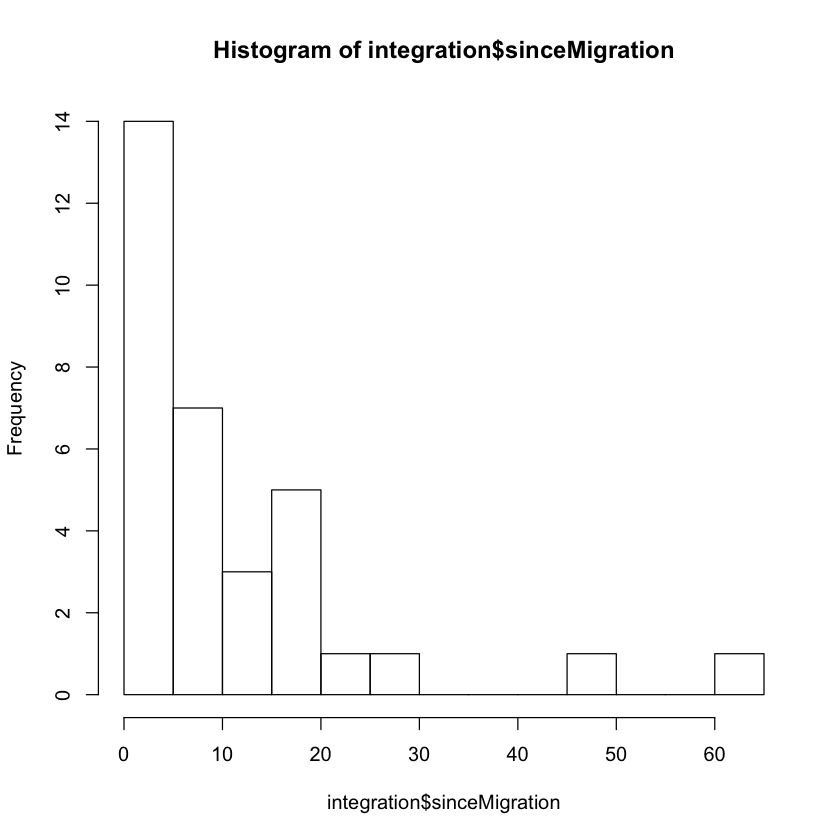

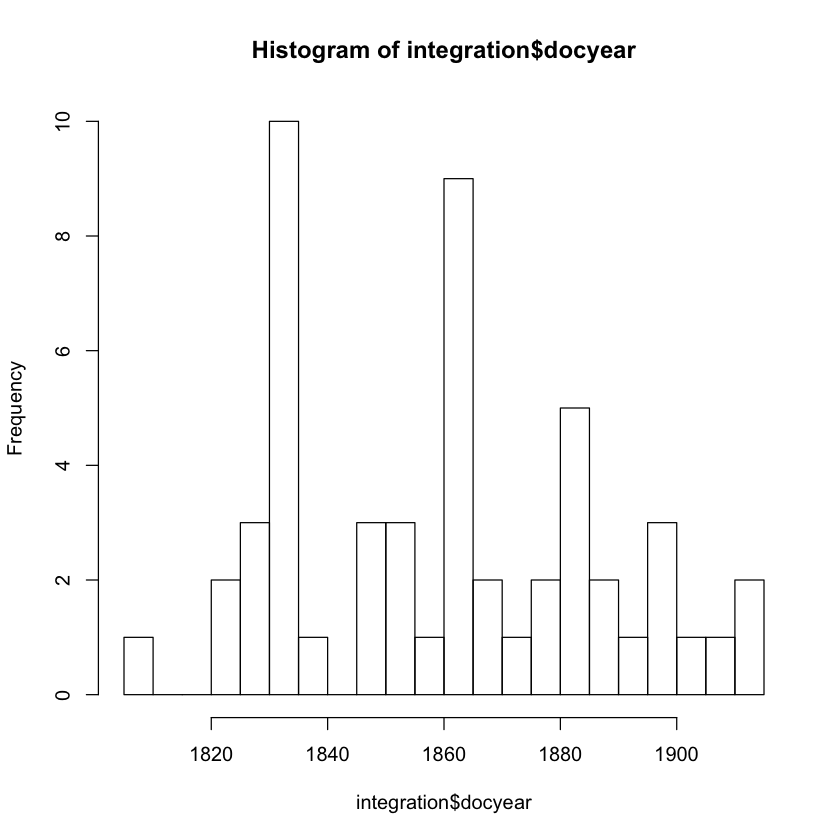

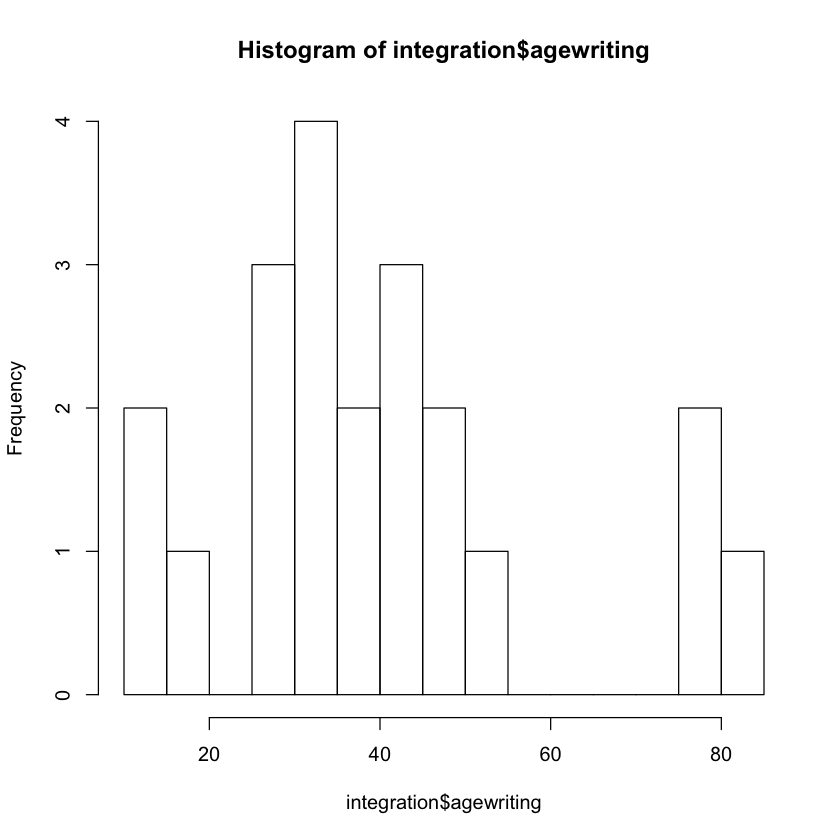

In [150]:
# View distributions
hist(integration$sinceMigration, breaks = 17)
hist(integration$docyear, breaks = 34)
hist(integration$agewriting, breaks = 19)

In [143]:
# What are the years of those spikes for docyear?
sort(table(integration$docyear), decreasing = TRUE)


1833 1863 1882 1828 1834 1864 1831 1850 1876 1898 1805 1822 1823 1835 1837 1849 
   4    4    4    3    3    3    2    2    2    2    1    1    1    1    1    1 
1851 1854 1855 1860 1861 1865 1868 1870 1873 1884 1887 1889 1892 1896 1901 1909 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
1911 1913 
   1    1 

In [145]:
# Take a closer look at the 1830s peak.
subset(integration, docyear > 1829 & docyear < 1836, select = "docyear")

,docyear
737,1831
738,1831
766,1834
773,1834
777,1833
780,1833
790,1835
793,1834
799,1833
801,1833


In [153]:
# Take a closer look at the 1860s peak.
subset(integration, docyear > 1859 & docyear < 1866, select = "docyear")

,docyear
519,1863
521,1863
524,1863
542,1864
554,1864
580,1863
596,1860
698,1865
735,1861
764,1864


In [147]:
# What percentage of the subset is this?
10/53

[1] 0.1886792